In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scanpy as sc

In [2]:
import sys
sys.path.append("../")

In [ ]:
! git clone https://github.com/azizilab/echidna3.git

In [4]:
%cd "echidna3" 
!pwd

/Users/joyfan/Desktop/echidna_analyses/josh stuff/echidna3
/Users/joyfan/Desktop/echidna_analyses/josh stuff/echidna3


In [6]:
! git pull 

Updating 62afb9f..01076b9
Fast-forward
 echidna/plot/__init__.py |  9 +++++++-
 echidna/plot/post.py     | 55 +++++++++++++++++++++++++++++++++++++++++++-----
 2 files changed, 58 insertions(+), 6 deletions(-)


In [7]:
%cd ..
!pwd

/Users/joyfan/Desktop/echidna_analyses/josh stuff
/Users/joyfan/Desktop/echidna_analyses/josh stuff


In [3]:
sys.path.append("./echidna3/")

In [4]:
import echidna as ec
ec.pl.activate_plot_settings()

In [243]:
#adata = sc.read_h5ad("data/X.h5")
wdf = pd.read_csv("data/all_cellranger_w.csv", index_col=0)

In [11]:
ec.tl.set_sort_order(
    adata,
    ["pre", "on", "on1", "on2", "post", "post1", "post1_pre2", "post1_on2", "post2"]
)

2024-12-06 10:39:13,081 | INFO : Added `.obs['echidna_split']`: the Echidna train/validation split.
 381 cells in validation set.
2024-12-06 10:39:13,093 | INFO : Added `.var[echidna_matched_genes]` : Labled True for genes contained in W.
2024-12-06 10:39:13,098 | INFO : Added `.var[echidna_W_R310_pre_count]` : CN entries for genes contained in W.
2024-12-06 10:39:13,098 | INFO : Added `.var[echidna_W_R310_on2_count]` : CN entries for genes contained in W.
2024-12-06 10:39:13,099 | WARNING : `leiden` changed to `leiden_categorical`.
/Users/joyfan/Desktop/echidna_analyses/josh stuff/./echidna3/echidna/tools/train.py:74: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2 4 2 ... 3 3 5]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  adata.obs.loc[:, config.clusters] = pd.Categorical(adata.obs.loc[:,config.clusters]).codes
training loss: 0.7868 | validation loss: 0.1328: 100%

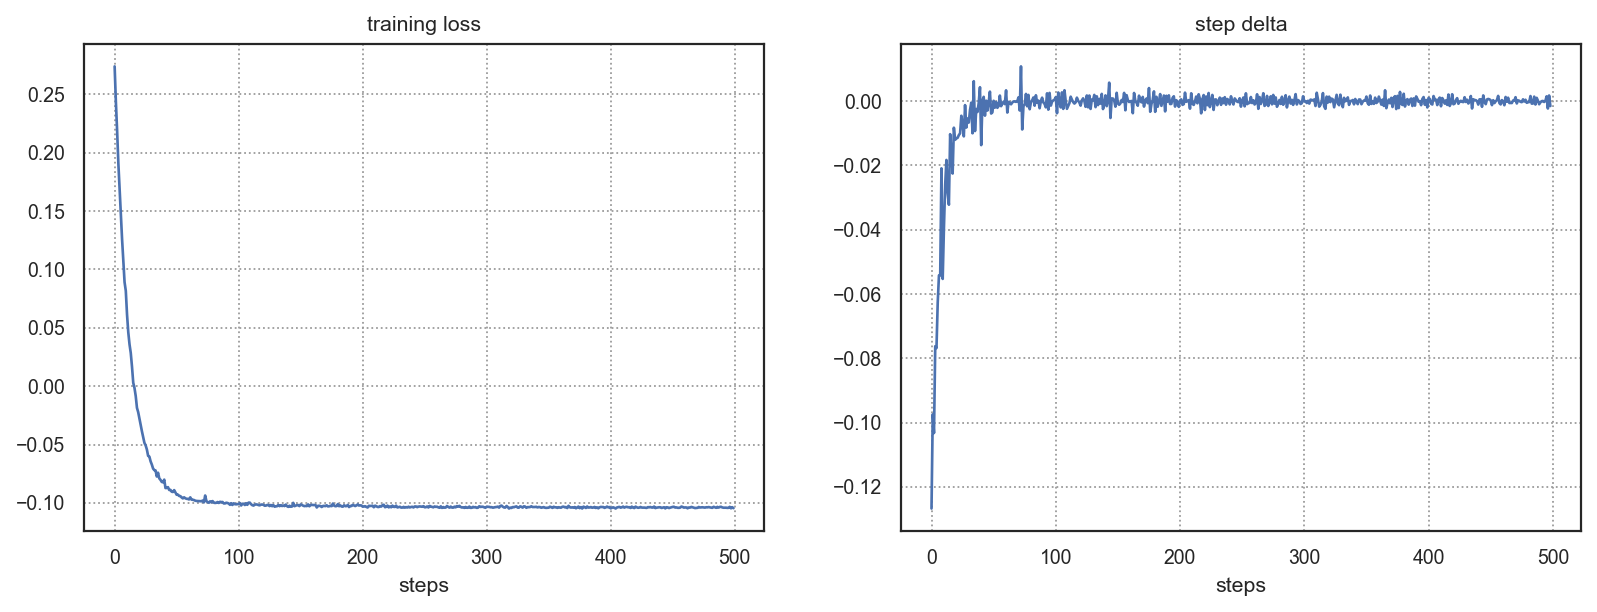

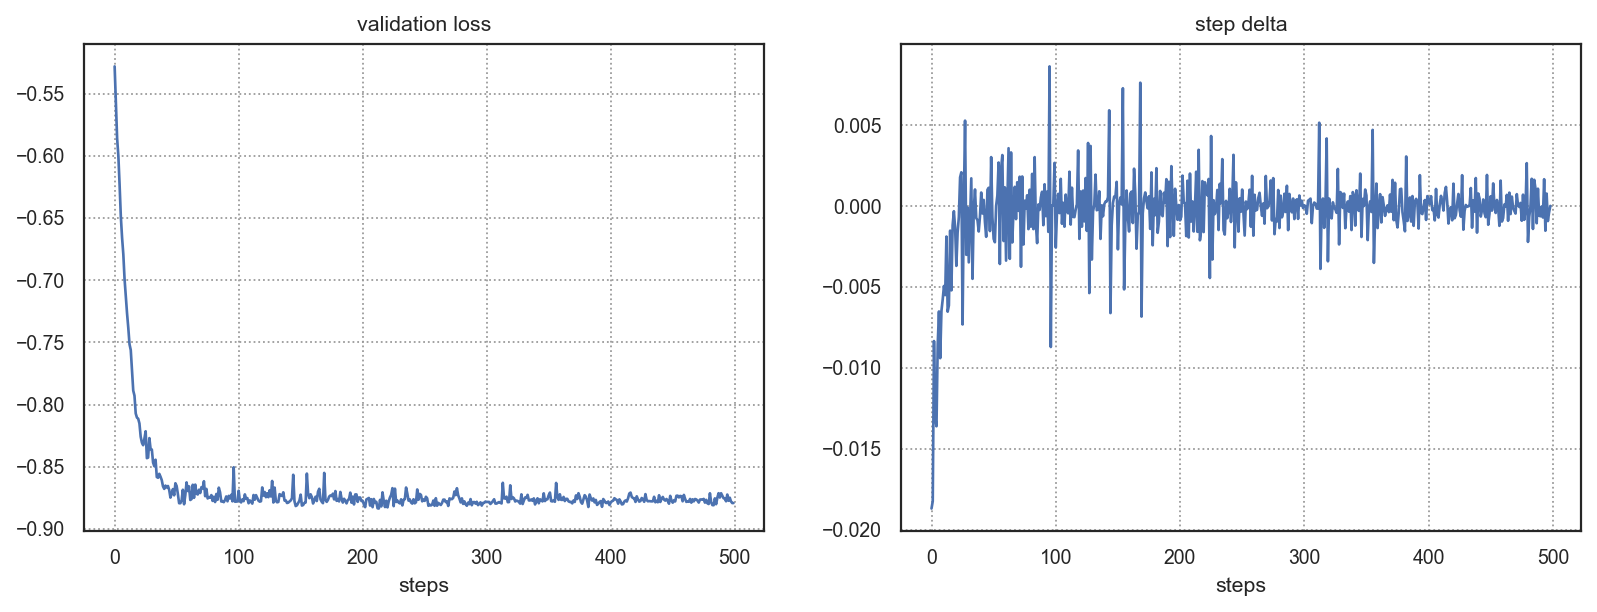

2024-12-06 10:58:50,238 | INFO : Saving echidna model with run_id 20241206-105850.


In [12]:
config = ec.tl.EchidnaConfig(
    timepoint_label = "timepoint", # `assert 'timepoint' in adata.obs.columns`
    counts_layer = "counts", # `assert 'counts' in list(adata.layers.keys())`
    clusters = "leiden", # `assert 'leiden' in adata.obs.columns`
    inverse_gamma = False, # Inverse Gamma False when we have more data
    patience = None, # Increase/decrease to affect early stopping, None for no early stopping (default)
    n_steps = 500,
    val_split = .1,
    learning_rate = .1,
    q_corr_init = 1e-2, # See README.md for model hyperparam descriptions
    q_shape_rate_scaler = 10.0,
    eta_mean_init = 2.0,
    lkj_concentration = 1.0,
)
ec.tl.echidna_train(
     adata # Single-cell AnnData
    , wdf # Copy number  pd.DataFrame, indexed with genes
    , config # Config settings
)

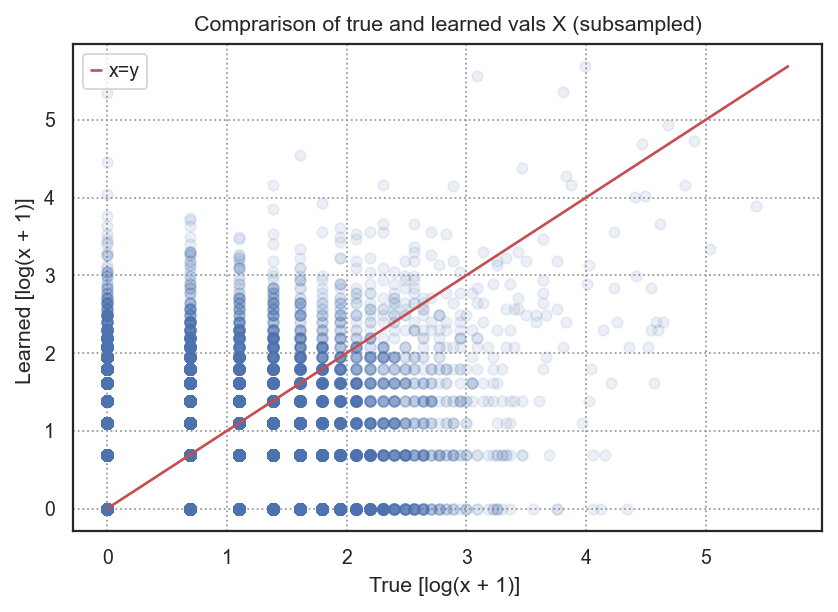

In [6]:
ec.pl.ppc(adata, variable="X")

In [13]:

ec.tl.echidna_clones(adata, threshold=0.1)

/Users/joyfan/Desktop/echidna_analyses/josh stuff/./echidna3/echidna/tools/eval.py:355: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hier_colors = [color_dict.loc[int(i)][0] for i in adata.obs[cluster_label]]
2024-12-06 11:56:50,776 | INFO : Added `.obs['echidna_clones']`: the learned clones from eta.


In [14]:
ec.tl.echidna_status(adata, threshold=.6)

/Users/joyfan/Desktop/echidna_analyses/josh stuff/./echidna3/echidna/tools/eval.py:417: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clones_gb = adata.obs.groupby(
/Users/joyfan/Desktop/echidna_analyses/josh stuff/./echidna3/echidna/tools/eval.py:422: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tp_gb = clones_gb.groupby(
/Users/joyfan/Desktop/echidna_analyses/josh stuff/./echidna3/echidna/tools/eval.py:460: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future 

In [19]:
#create dict of pre source nodes
pre_clones={}
treatment = adata.obs["sample"]
clonality = adata.obs["echidna_clones"]
for i in range(len(treatment)):
    if treatment[i]=='R310_pre':
        if clonality[i]!=-1:
            if clonality[i] in pre_clones:
                #pre_clones[clonality[i]]=pre_clones[clonality[i]]+[r310.obs_names[i]]
                pre_clones[clonality[i]]=pre_clones[clonality[i]]+1
            else:
                #pre_clones[clonality[i]]=[r310.obs_names[i]]
                pre_clones[clonality[i]]=1

/var/folders/ls/bynfxvkd45n7qyly8qv285pm0000gn/T/ipykernel_7086/3891672227.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if treatment[i]=='R310_pre':
/var/folders/ls/bynfxvkd45n7qyly8qv285pm0000gn/T/ipykernel_7086/3891672227.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if clonality[i]!=-1:
/var/folders/ls/bynfxvkd45n7qyly8qv285pm0000gn/T/ipykernel_7086/3891672227.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if cl

In [20]:
#create dict of on later nodes
later_clones={}
for i in range(len(treatment)):
    if treatment[i]=='R310_on2':
        if clonality[i]!=-1:
            if clonality[i] in later_clones:
                later_clones[clonality[i]]=later_clones[clonality[i]]+1
            else:
                later_clones[clonality[i]]=1


/var/folders/ls/bynfxvkd45n7qyly8qv285pm0000gn/T/ipykernel_7086/1311853550.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if treatment[i]=='R310_on2':
/var/folders/ls/bynfxvkd45n7qyly8qv285pm0000gn/T/ipykernel_7086/1311853550.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if clonality[i]!=-1:
/var/folders/ls/bynfxvkd45n7qyly8qv285pm0000gn/T/ipykernel_7086/1311853550.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if cl

In [21]:
clone_by_time={}
for i in np.unique(clonality):
    if i in pre_clones:
        clone_by_time[str(i)]=[pre_clones[i]/np.sum(list(pre_clones.values()))]
    else:
        clone_by_time[str(i)]=[0]
        
    if i in later_clones:
        clone_by_time[str(i)]=clone_by_time[str(i)]+[later_clones[i]/np.sum(list(later_clones.values()))]
    else:
        clone_by_time[str(i)]=clone_by_time[str(i)]+[0]

2024-12-07 18:42:42,988 | INFO : maxp pruned
2024-12-07 18:42:42,989 | INFO : LTSH dropped
2024-12-07 18:42:42,990 | INFO : cmap pruned
2024-12-07 18:42:42,991 | INFO : kern dropped
2024-12-07 18:42:42,994 | INFO : post pruned
2024-12-07 18:42:42,995 | INFO : PCLT dropped
2024-12-07 18:42:42,995 | INFO : JSTF dropped
2024-12-07 18:42:42,996 | INFO : DSIG dropped
2024-12-07 18:42:42,998 | INFO : GPOS pruned
2024-12-07 18:42:42,999 | INFO : GSUB pruned
2024-12-07 18:42:43,001 | INFO : glyf pruned
2024-12-07 18:42:43,003 | INFO : Added gid0 to subset
2024-12-07 18:42:43,003 | INFO : Added first four glyphs to subset
2024-12-07 18:42:43,003 | INFO : Closing glyph list over 'GSUB': 33 glyphs before
2024-12-07 18:42:43,004 | INFO : Glyph names: ['.notdef', '.null', 'C', 'I', 'N', 'P', 'T', 'V', 'a', 'c', 'd', 'e', 'eight', 'f', 'four', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'six', 'space', 't', 'three', 'two', 'y', 'zero']
2024-12-07 18:42:43,004 | INFO 

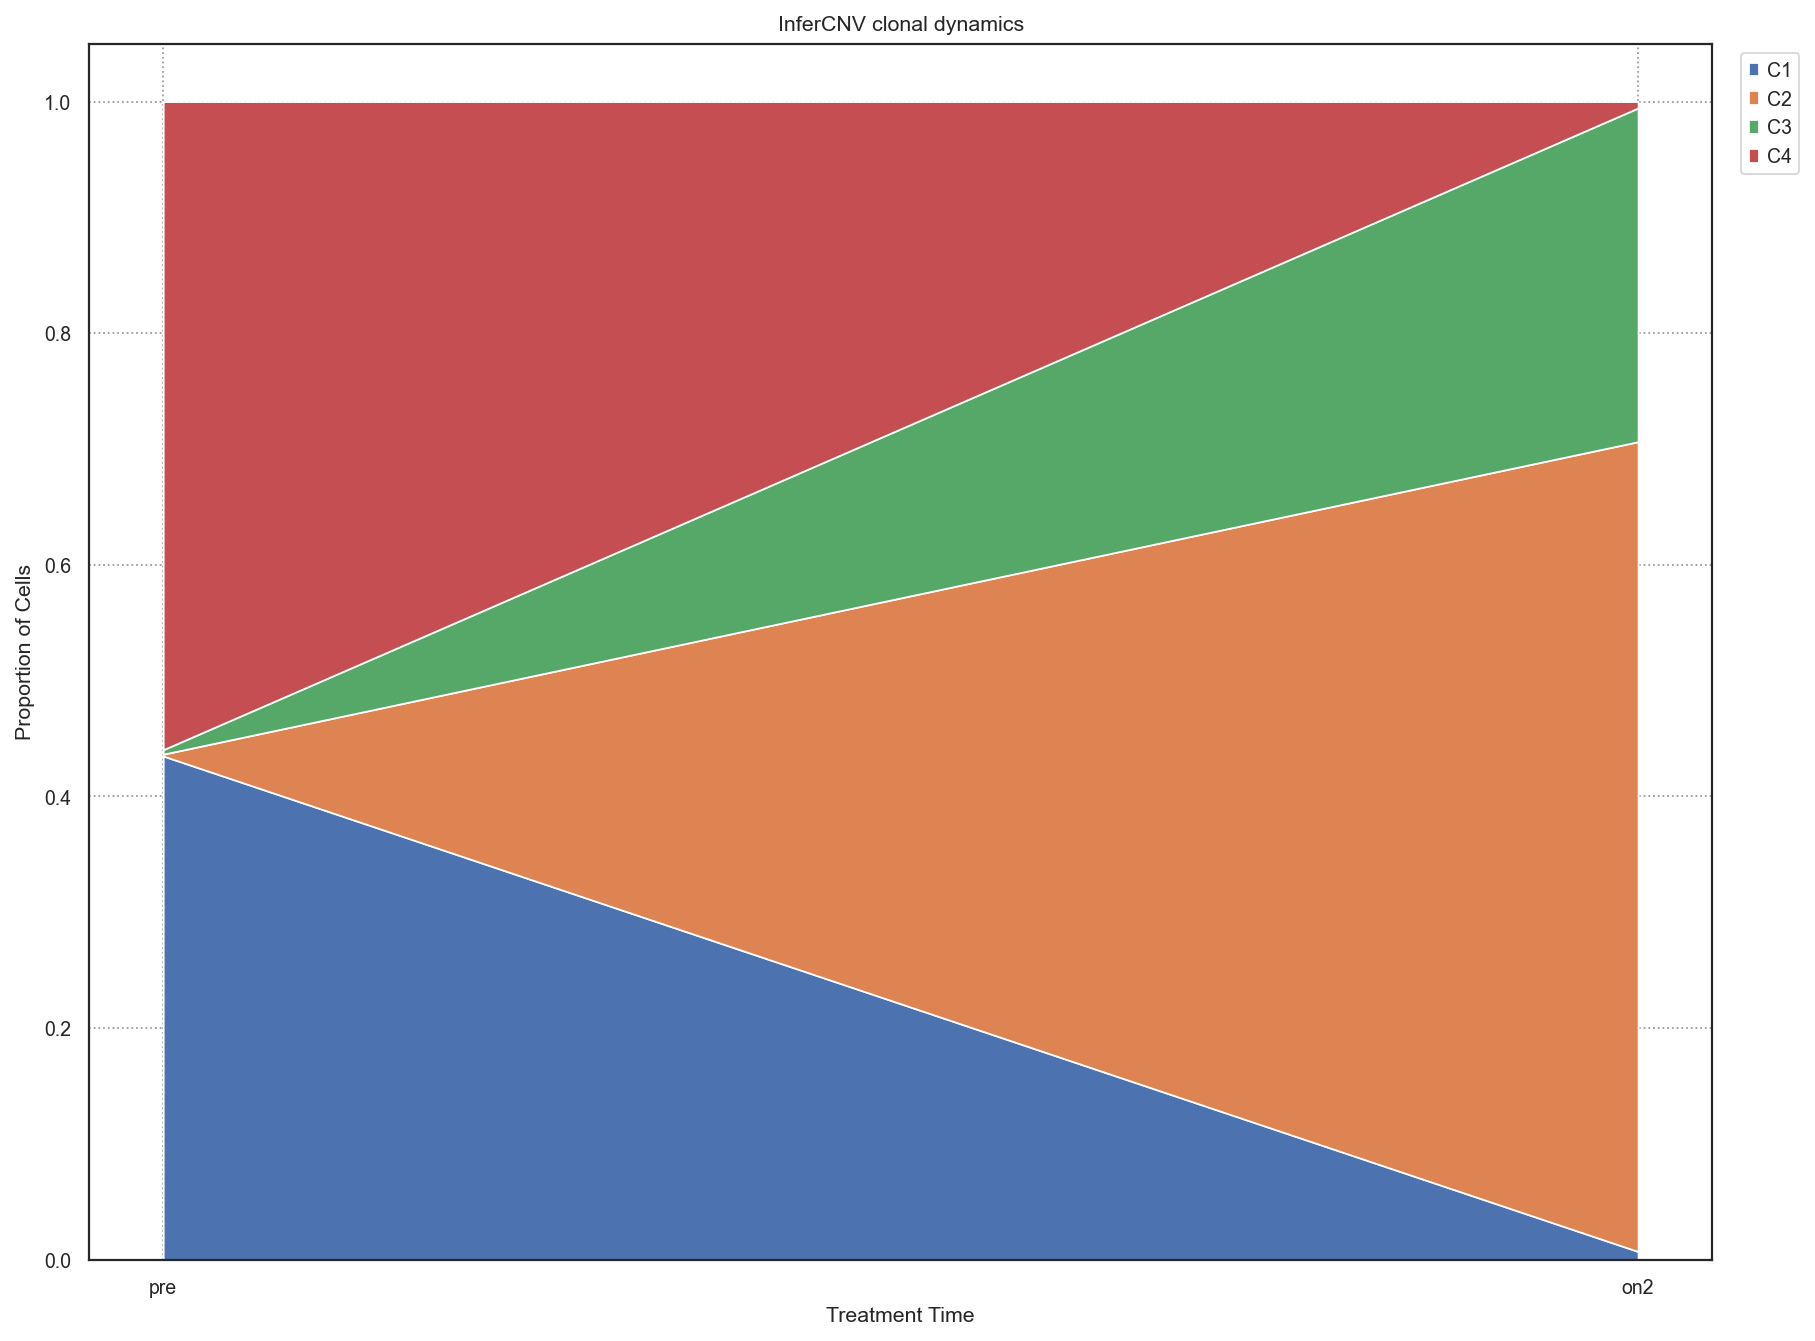

In [27]:
times = ["pre","on2"]


fig, ax = plt.subplots(figsize=(13,10))
ax.stackplot(times, clone_by_time.values(),
             labels=clone_by_time.keys())
ax.legend(loc='upper right', bbox_to_anchor=(1.06, 1))
ax.set_title('InferCNV clonal dynamics')
ax.set_xlabel('Treatment Time')
ax.set_ylabel('Proportion of Cells')

plt.savefig("FIGURES/dynamics.pdf",dpi=300, format='pdf')

plt.show()

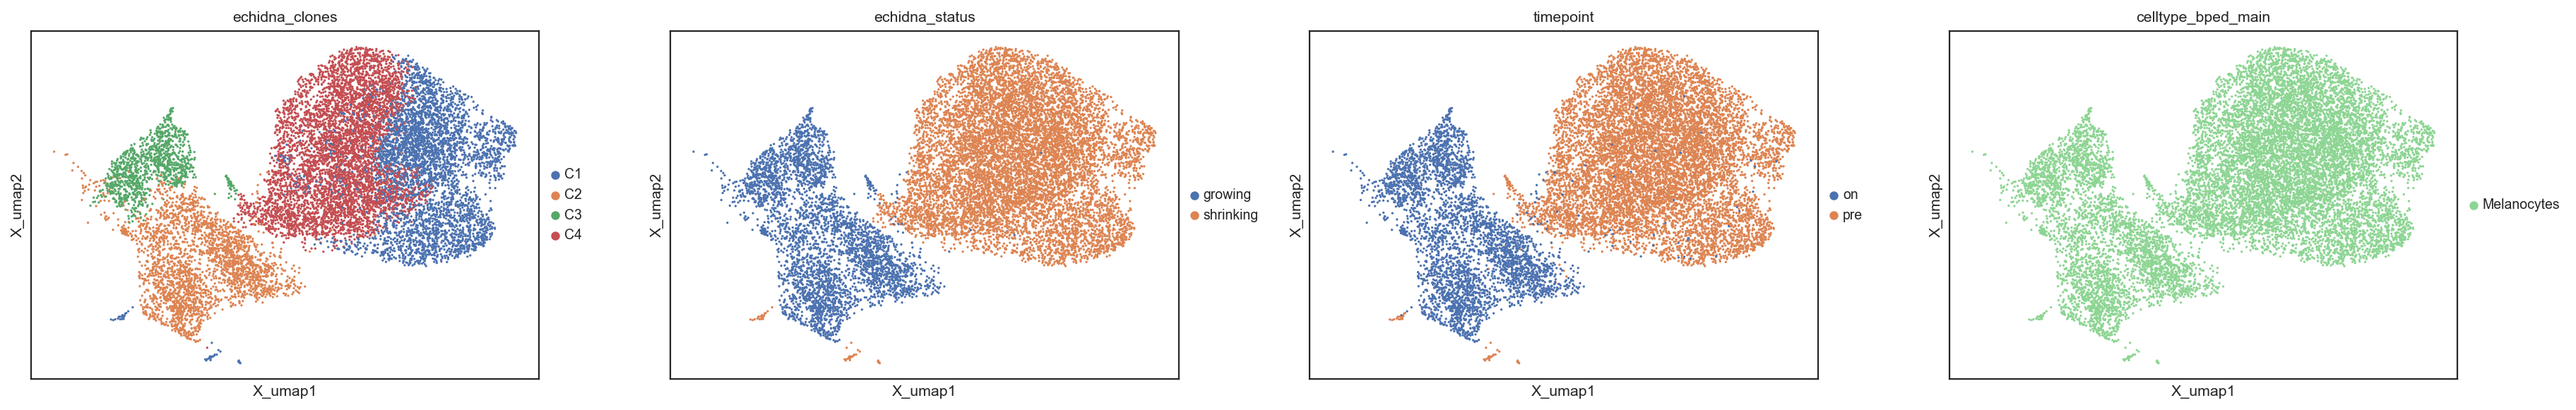

In [47]:
ec.pl.echidna(adata, ["echidna_clones", "echidna_status", "timepoint","celltype_bped_main"])

In [25]:
adata.write_h5ad("r310_joy_run.h5")

In [340]:
adata = sc.read_h5ad("r310_joy_run.h5")

In [8]:
# Plot using seaborn
sns.set(font_scale = 1.7)

2024-12-08 15:33:40,327 | INFO : `genome` not set, defaulting to hg38wgEncodeGencodeCompV46.
2024-12-08 15:33:42,089 | INFO : maxp pruned
2024-12-08 15:33:42,090 | INFO : LTSH dropped
2024-12-08 15:33:42,090 | INFO : cmap pruned
2024-12-08 15:33:42,090 | INFO : kern dropped
2024-12-08 15:33:42,093 | INFO : post pruned
2024-12-08 15:33:42,093 | INFO : PCLT dropped
2024-12-08 15:33:42,094 | INFO : JSTF dropped
2024-12-08 15:33:42,094 | INFO : DSIG dropped
2024-12-08 15:33:42,096 | INFO : GPOS pruned
2024-12-08 15:33:42,097 | INFO : GSUB pruned
2024-12-08 15:33:42,100 | INFO : glyf pruned
2024-12-08 15:33:42,102 | INFO : Added gid0 to subset
2024-12-08 15:33:42,102 | INFO : Added first four glyphs to subset
2024-12-08 15:33:42,102 | INFO : Closing glyph list over 'GSUB': 41 glyphs before
2024-12-08 15:33:42,103 | INFO : Glyph names: ['.notdef', '.null', 'C', 'D', 'E', 'G', 'N', 'a', 'b', 'c', 'd', 'e', 'eight', 'equal', 'five', 'four', 'g', 'h', 'i', 'l', 'm', 'minus', 'n', 'nine', 'nonma

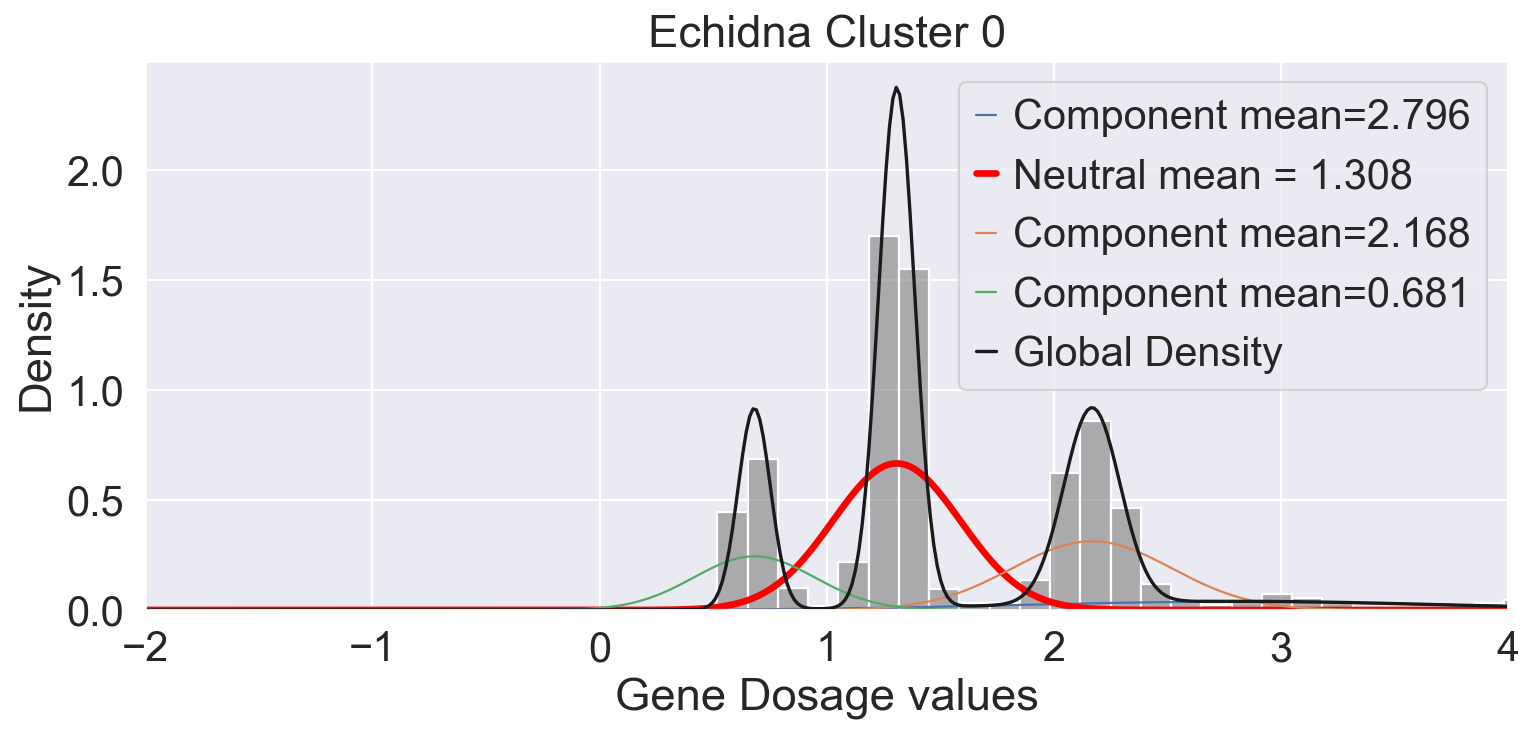

2024-12-08 15:33:42,497 | INFO : maxp pruned
2024-12-08 15:33:42,498 | INFO : LTSH dropped
2024-12-08 15:33:42,499 | INFO : cmap pruned
2024-12-08 15:33:42,499 | INFO : kern dropped
2024-12-08 15:33:42,501 | INFO : post pruned
2024-12-08 15:33:42,502 | INFO : PCLT dropped
2024-12-08 15:33:42,502 | INFO : JSTF dropped
2024-12-08 15:33:42,502 | INFO : DSIG dropped
2024-12-08 15:33:42,505 | INFO : GPOS pruned
2024-12-08 15:33:42,506 | INFO : GSUB pruned
2024-12-08 15:33:42,508 | INFO : glyf pruned
2024-12-08 15:33:42,510 | INFO : Added gid0 to subset
2024-12-08 15:33:42,510 | INFO : Added first four glyphs to subset
2024-12-08 15:33:42,510 | INFO : Closing glyph list over 'GSUB': 40 glyphs before
2024-12-08 15:33:42,511 | INFO : Glyph names: ['.notdef', '.null', 'C', 'D', 'E', 'G', 'N', 'a', 'b', 'c', 'd', 'e', 'eight', 'equal', 'five', 'four', 'g', 'h', 'i', 'l', 'm', 'minus', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'seven', 'space', 't', 'three', 'two', 'u'

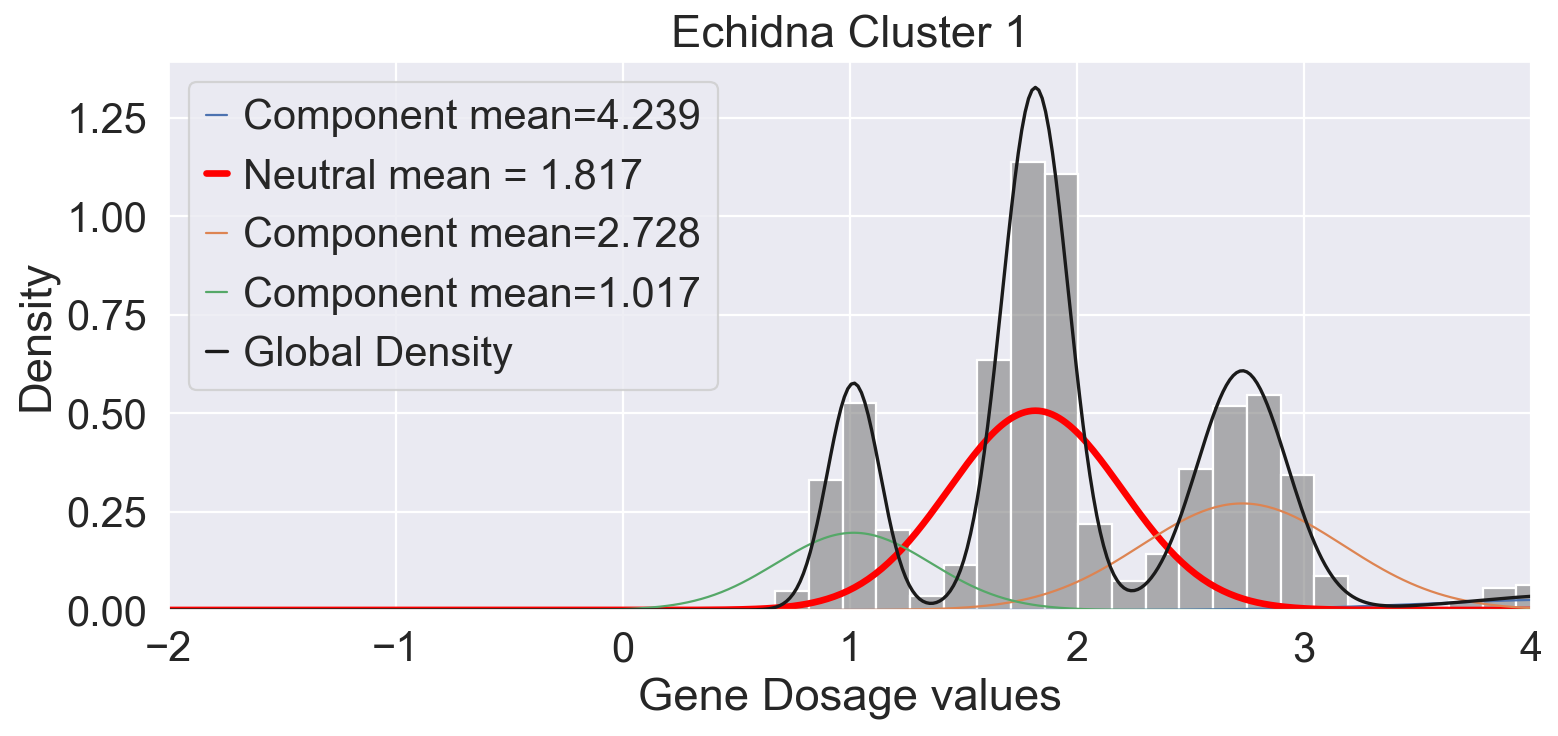

2024-12-08 15:33:42,885 | INFO : maxp pruned
2024-12-08 15:33:42,886 | INFO : LTSH dropped
2024-12-08 15:33:42,886 | INFO : cmap pruned
2024-12-08 15:33:42,887 | INFO : kern dropped
2024-12-08 15:33:42,889 | INFO : post pruned
2024-12-08 15:33:42,889 | INFO : PCLT dropped
2024-12-08 15:33:42,890 | INFO : JSTF dropped
2024-12-08 15:33:42,890 | INFO : DSIG dropped
2024-12-08 15:33:42,892 | INFO : GPOS pruned
2024-12-08 15:33:42,893 | INFO : GSUB pruned
2024-12-08 15:33:42,895 | INFO : glyf pruned
2024-12-08 15:33:42,897 | INFO : Added gid0 to subset
2024-12-08 15:33:42,897 | INFO : Added first four glyphs to subset
2024-12-08 15:33:42,897 | INFO : Closing glyph list over 'GSUB': 40 glyphs before
2024-12-08 15:33:42,898 | INFO : Glyph names: ['.notdef', '.null', 'C', 'D', 'E', 'G', 'N', 'a', 'b', 'c', 'd', 'e', 'eight', 'equal', 'five', 'four', 'g', 'h', 'i', 'l', 'm', 'minus', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'seven', 'six', 'space', 't', 'three', 'two', 'u',

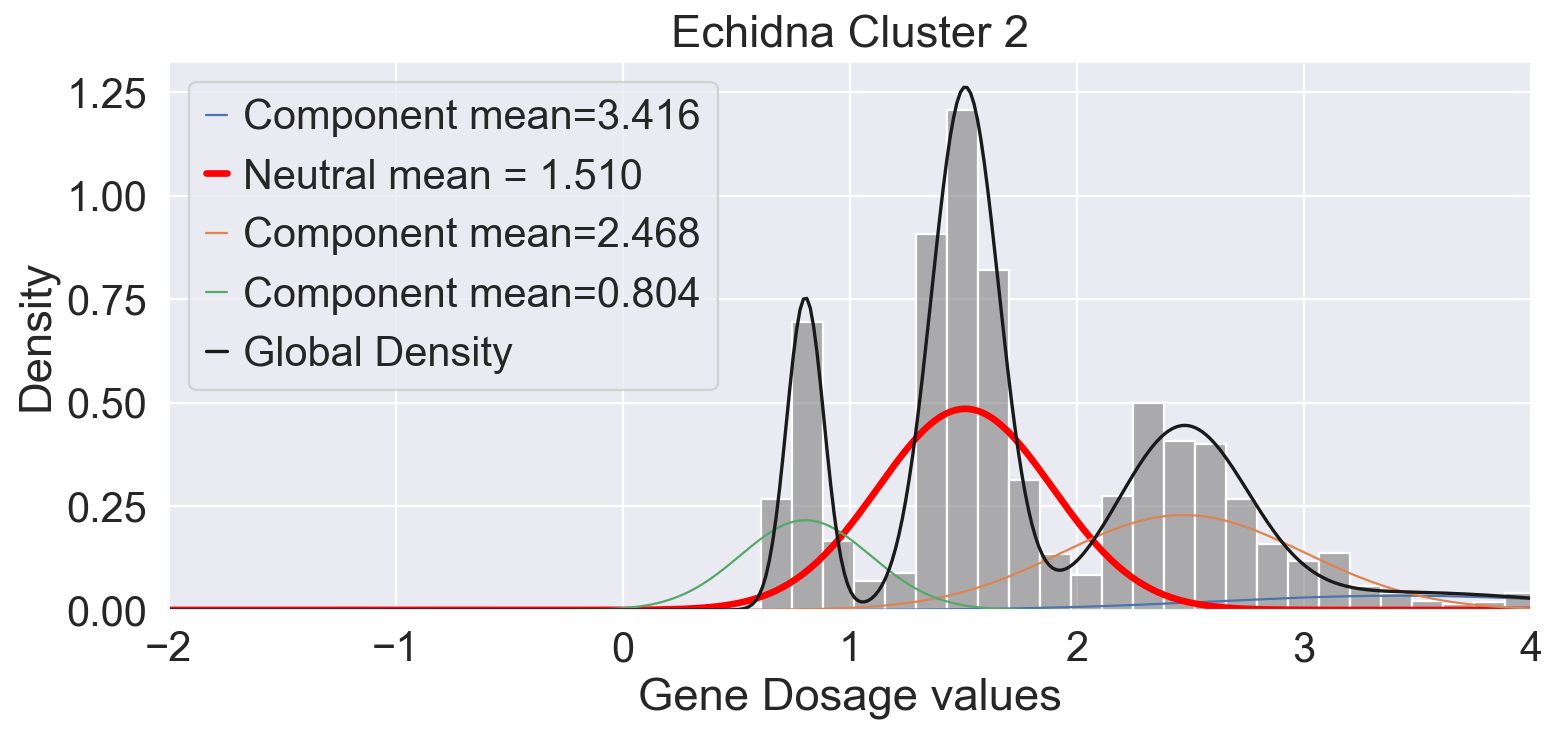

2024-12-08 15:33:43,268 | INFO : maxp pruned
2024-12-08 15:33:43,269 | INFO : LTSH dropped
2024-12-08 15:33:43,270 | INFO : cmap pruned
2024-12-08 15:33:43,270 | INFO : kern dropped
2024-12-08 15:33:43,272 | INFO : post pruned
2024-12-08 15:33:43,273 | INFO : PCLT dropped
2024-12-08 15:33:43,273 | INFO : JSTF dropped
2024-12-08 15:33:43,273 | INFO : DSIG dropped
2024-12-08 15:33:43,275 | INFO : GPOS pruned
2024-12-08 15:33:43,276 | INFO : GSUB pruned
2024-12-08 15:33:43,279 | INFO : glyf pruned
2024-12-08 15:33:43,281 | INFO : Added gid0 to subset
2024-12-08 15:33:43,281 | INFO : Added first four glyphs to subset
2024-12-08 15:33:43,282 | INFO : Closing glyph list over 'GSUB': 40 glyphs before
2024-12-08 15:33:43,282 | INFO : Glyph names: ['.notdef', '.null', 'C', 'D', 'E', 'G', 'N', 'a', 'b', 'c', 'd', 'e', 'equal', 'five', 'four', 'g', 'h', 'i', 'l', 'm', 'minus', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'seven', 'six', 'space', 't', 'three', 'two', 'u', 

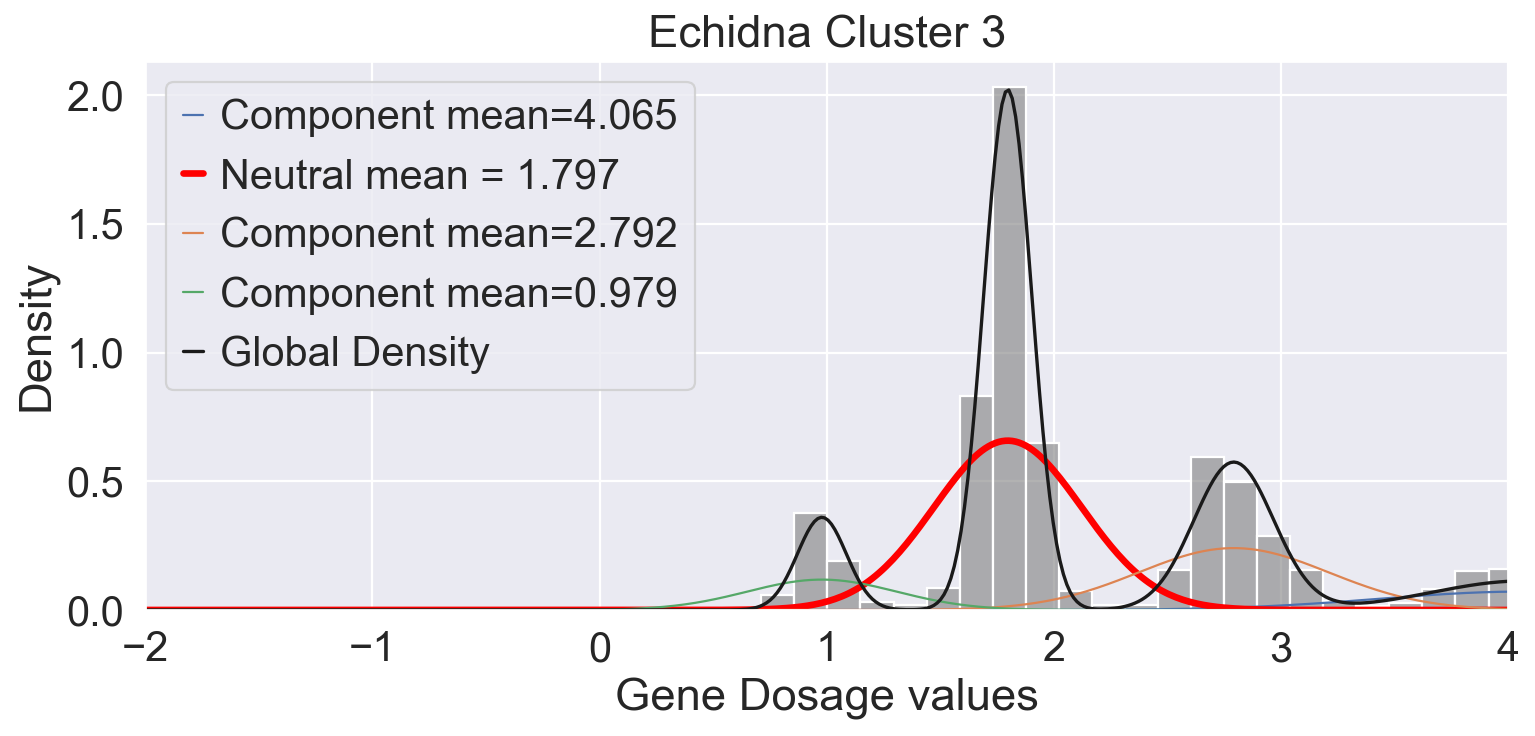

2024-12-08 15:33:43,653 | INFO : maxp pruned
2024-12-08 15:33:43,653 | INFO : LTSH dropped
2024-12-08 15:33:43,654 | INFO : cmap pruned
2024-12-08 15:33:43,654 | INFO : kern dropped
2024-12-08 15:33:43,656 | INFO : post pruned
2024-12-08 15:33:43,657 | INFO : PCLT dropped
2024-12-08 15:33:43,657 | INFO : JSTF dropped
2024-12-08 15:33:43,657 | INFO : DSIG dropped
2024-12-08 15:33:43,660 | INFO : GPOS pruned
2024-12-08 15:33:43,661 | INFO : GSUB pruned
2024-12-08 15:33:43,663 | INFO : glyf pruned
2024-12-08 15:33:43,665 | INFO : Added gid0 to subset
2024-12-08 15:33:43,665 | INFO : Added first four glyphs to subset
2024-12-08 15:33:43,666 | INFO : Closing glyph list over 'GSUB': 41 glyphs before
2024-12-08 15:33:43,666 | INFO : Glyph names: ['.notdef', '.null', 'C', 'D', 'E', 'G', 'N', 'a', 'b', 'c', 'd', 'e', 'eight', 'equal', 'five', 'four', 'g', 'h', 'i', 'l', 'm', 'minus', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'seven', 'six', 'space', 't', 'three', 'tw

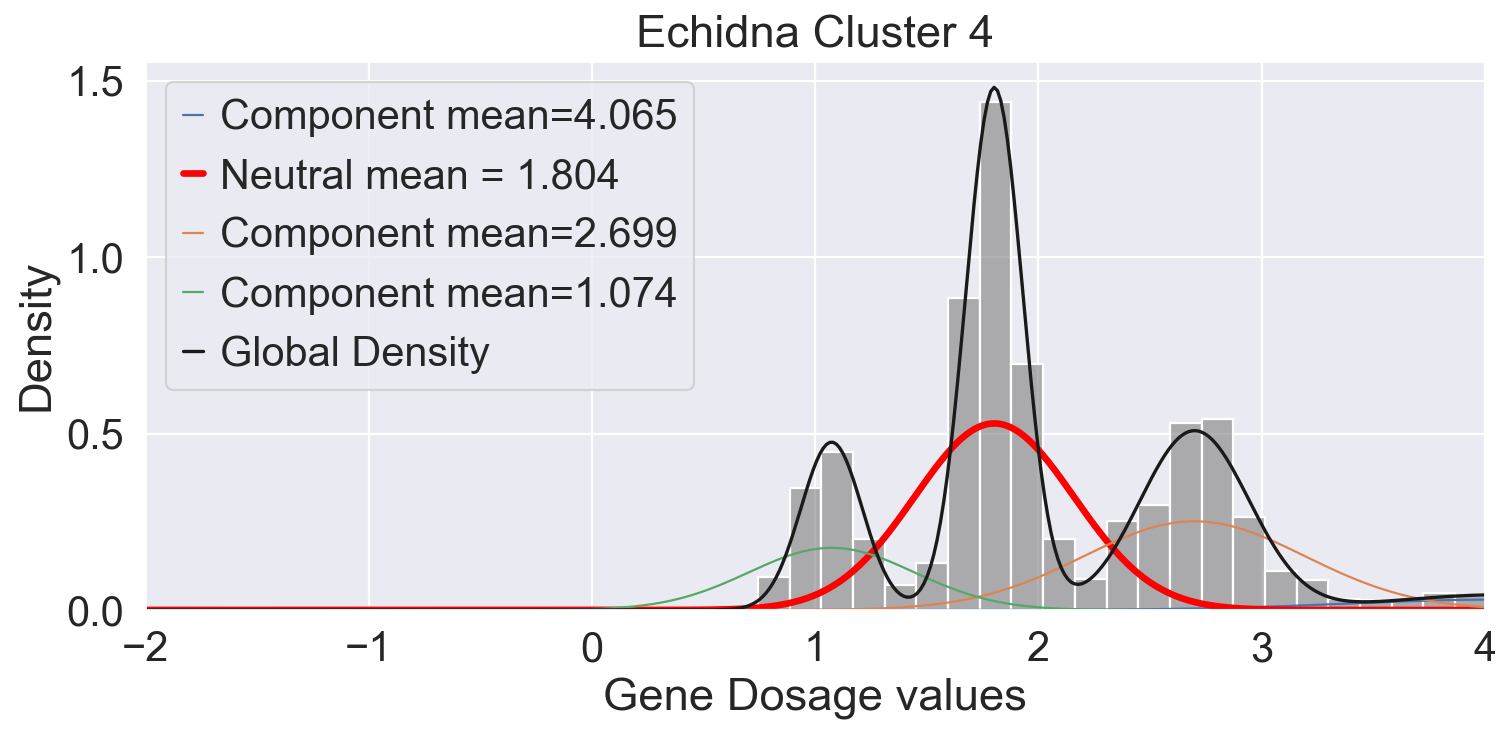

2024-12-08 15:33:44,107 | INFO : maxp pruned
2024-12-08 15:33:44,108 | INFO : LTSH dropped
2024-12-08 15:33:44,109 | INFO : cmap pruned
2024-12-08 15:33:44,109 | INFO : kern dropped
2024-12-08 15:33:44,111 | INFO : post pruned
2024-12-08 15:33:44,112 | INFO : PCLT dropped
2024-12-08 15:33:44,112 | INFO : JSTF dropped
2024-12-08 15:33:44,112 | INFO : DSIG dropped
2024-12-08 15:33:44,114 | INFO : GPOS pruned
2024-12-08 15:33:44,116 | INFO : GSUB pruned
2024-12-08 15:33:44,119 | INFO : glyf pruned
2024-12-08 15:33:44,121 | INFO : Added gid0 to subset
2024-12-08 15:33:44,121 | INFO : Added first four glyphs to subset
2024-12-08 15:33:44,121 | INFO : Closing glyph list over 'GSUB': 41 glyphs before
2024-12-08 15:33:44,122 | INFO : Glyph names: ['.notdef', '.null', 'C', 'D', 'E', 'G', 'N', 'a', 'b', 'c', 'd', 'e', 'eight', 'equal', 'five', 'four', 'g', 'h', 'i', 'l', 'm', 'minus', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'seven', 'six', 'space', 't', 'three', 'tw

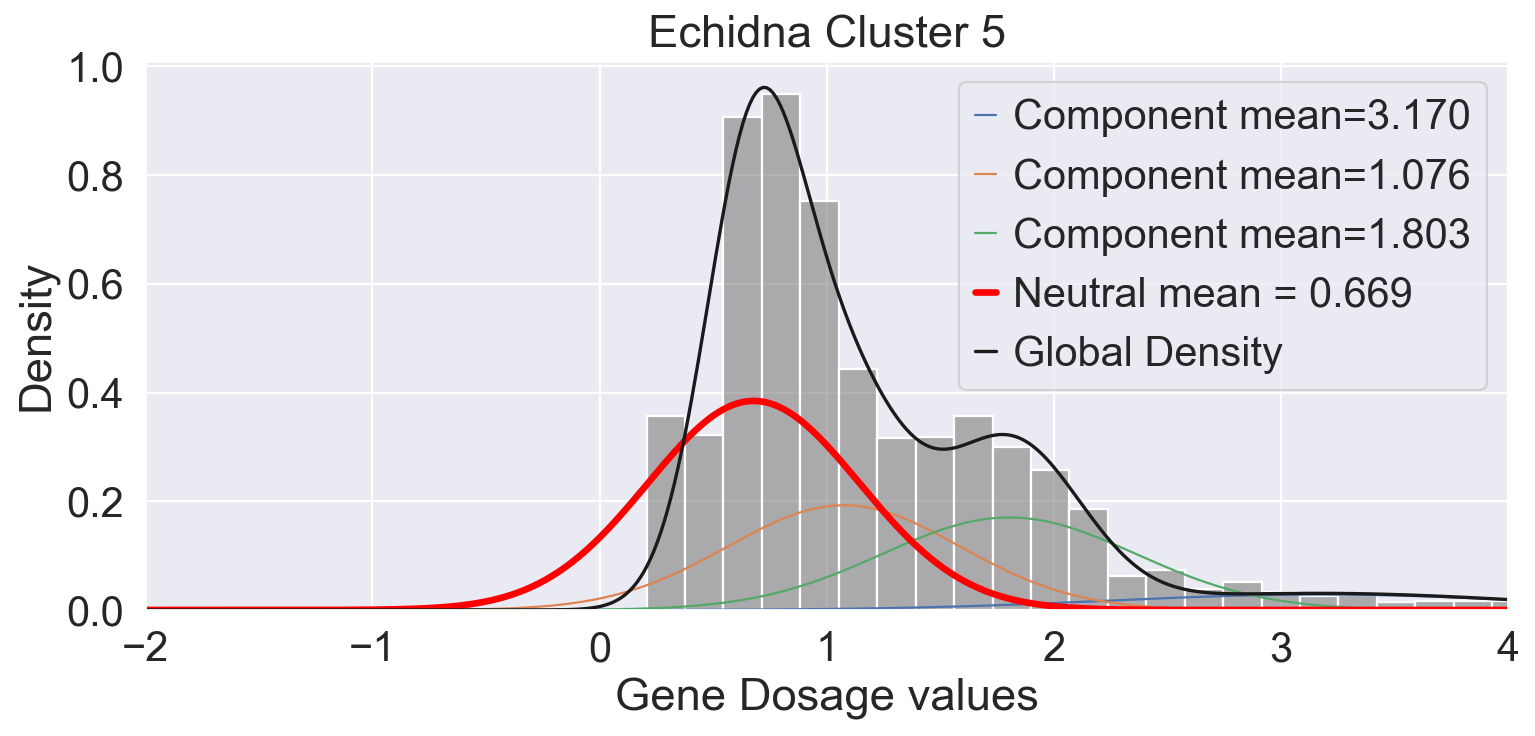

2024-12-08 15:33:44,495 | INFO : maxp pruned
2024-12-08 15:33:44,496 | INFO : LTSH dropped
2024-12-08 15:33:44,496 | INFO : cmap pruned
2024-12-08 15:33:44,497 | INFO : kern dropped
2024-12-08 15:33:44,499 | INFO : post pruned
2024-12-08 15:33:44,500 | INFO : PCLT dropped
2024-12-08 15:33:44,500 | INFO : JSTF dropped
2024-12-08 15:33:44,500 | INFO : DSIG dropped
2024-12-08 15:33:44,503 | INFO : GPOS pruned
2024-12-08 15:33:44,505 | INFO : GSUB pruned
2024-12-08 15:33:44,507 | INFO : glyf pruned
2024-12-08 15:33:44,509 | INFO : Added gid0 to subset
2024-12-08 15:33:44,509 | INFO : Added first four glyphs to subset
2024-12-08 15:33:44,509 | INFO : Closing glyph list over 'GSUB': 41 glyphs before
2024-12-08 15:33:44,510 | INFO : Glyph names: ['.notdef', '.null', 'C', 'D', 'E', 'G', 'N', 'a', 'b', 'c', 'd', 'e', 'eight', 'equal', 'five', 'four', 'g', 'h', 'i', 'l', 'm', 'minus', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'seven', 'six', 'space', 't', 'three', 'tw

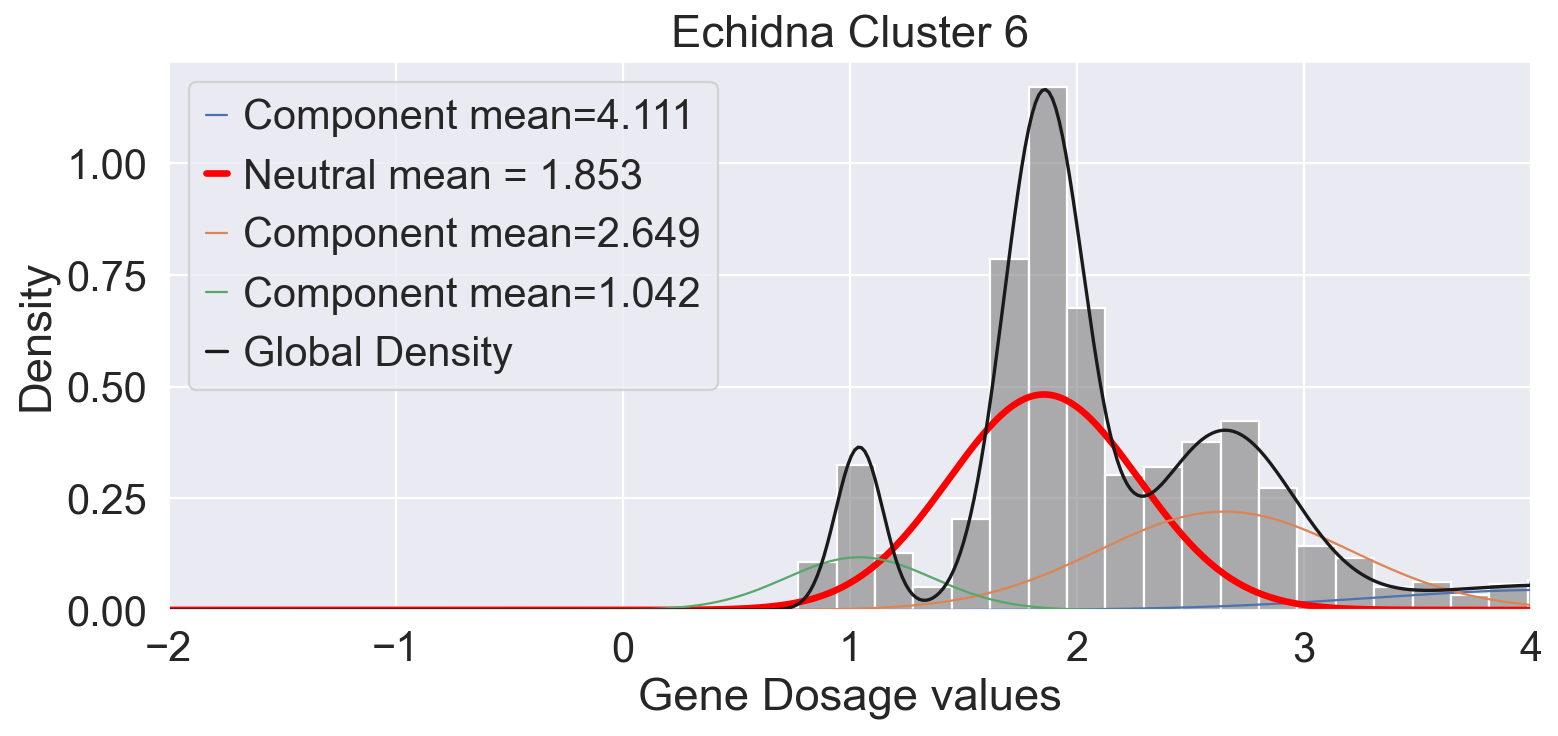

2024-12-08 15:33:44,885 | INFO : maxp pruned
2024-12-08 15:33:44,885 | INFO : LTSH dropped
2024-12-08 15:33:44,886 | INFO : cmap pruned
2024-12-08 15:33:44,886 | INFO : kern dropped
2024-12-08 15:33:44,888 | INFO : post pruned
2024-12-08 15:33:44,889 | INFO : PCLT dropped
2024-12-08 15:33:44,889 | INFO : JSTF dropped
2024-12-08 15:33:44,889 | INFO : DSIG dropped
2024-12-08 15:33:44,892 | INFO : GPOS pruned
2024-12-08 15:33:44,893 | INFO : GSUB pruned
2024-12-08 15:33:44,895 | INFO : glyf pruned
2024-12-08 15:33:44,897 | INFO : Added gid0 to subset
2024-12-08 15:33:44,898 | INFO : Added first four glyphs to subset
2024-12-08 15:33:44,898 | INFO : Closing glyph list over 'GSUB': 40 glyphs before
2024-12-08 15:33:44,898 | INFO : Glyph names: ['.notdef', '.null', 'C', 'D', 'E', 'G', 'N', 'a', 'b', 'c', 'd', 'e', 'eight', 'equal', 'five', 'four', 'g', 'h', 'i', 'l', 'm', 'minus', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'seven', 'six', 'space', 't', 'three', 'two', 'u',

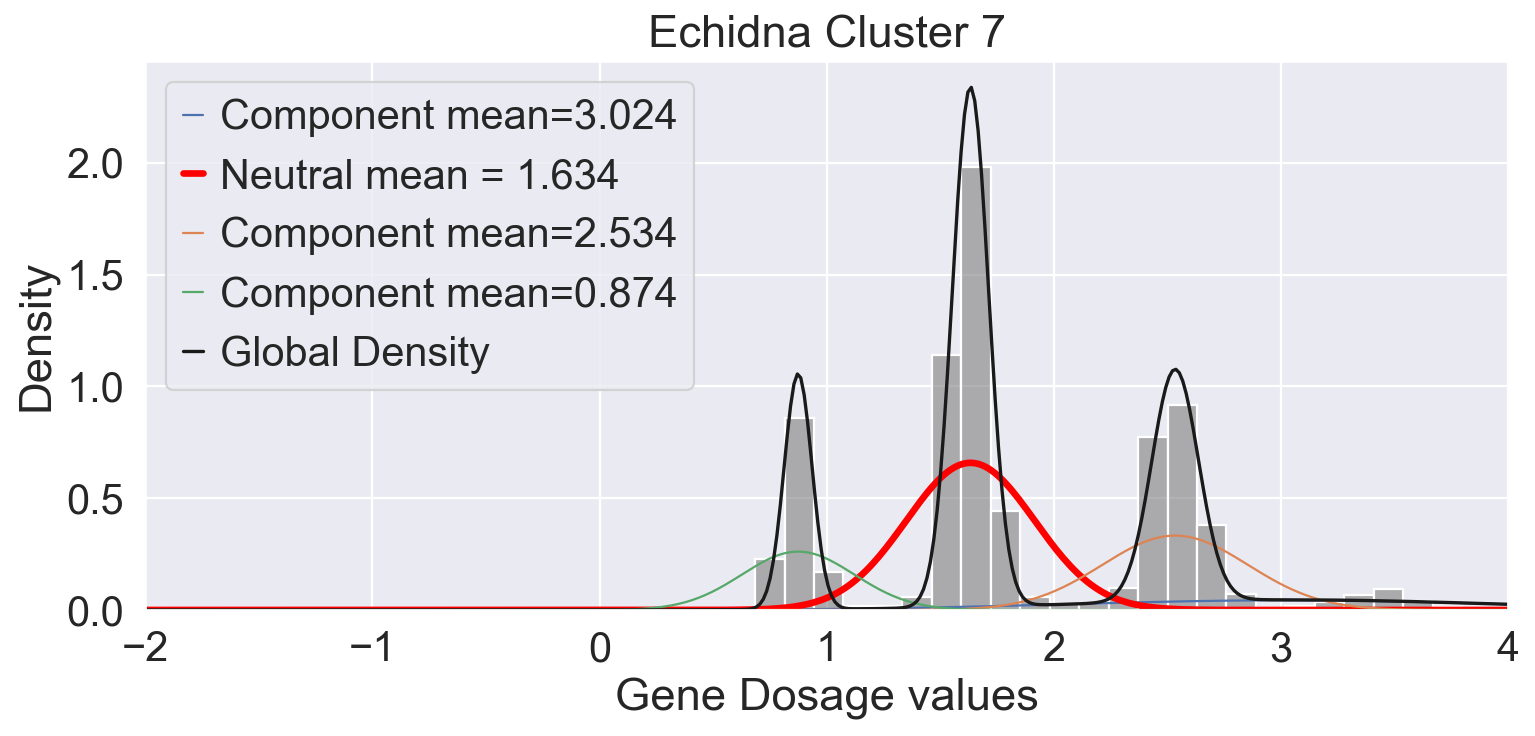

2024-12-08 15:33:45,269 | INFO : maxp pruned
2024-12-08 15:33:45,270 | INFO : LTSH dropped
2024-12-08 15:33:45,270 | INFO : cmap pruned
2024-12-08 15:33:45,270 | INFO : kern dropped
2024-12-08 15:33:45,273 | INFO : post pruned
2024-12-08 15:33:45,273 | INFO : PCLT dropped
2024-12-08 15:33:45,273 | INFO : JSTF dropped
2024-12-08 15:33:45,273 | INFO : DSIG dropped
2024-12-08 15:33:45,276 | INFO : GPOS pruned
2024-12-08 15:33:45,277 | INFO : GSUB pruned
2024-12-08 15:33:45,279 | INFO : glyf pruned
2024-12-08 15:33:45,281 | INFO : Added gid0 to subset
2024-12-08 15:33:45,281 | INFO : Added first four glyphs to subset
2024-12-08 15:33:45,282 | INFO : Closing glyph list over 'GSUB': 40 glyphs before
2024-12-08 15:33:45,282 | INFO : Glyph names: ['.notdef', '.null', 'C', 'D', 'E', 'G', 'N', 'a', 'b', 'c', 'd', 'e', 'eight', 'equal', 'four', 'g', 'h', 'i', 'l', 'm', 'minus', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'seven', 'six', 'space', 't', 'three', 'two', 'u',

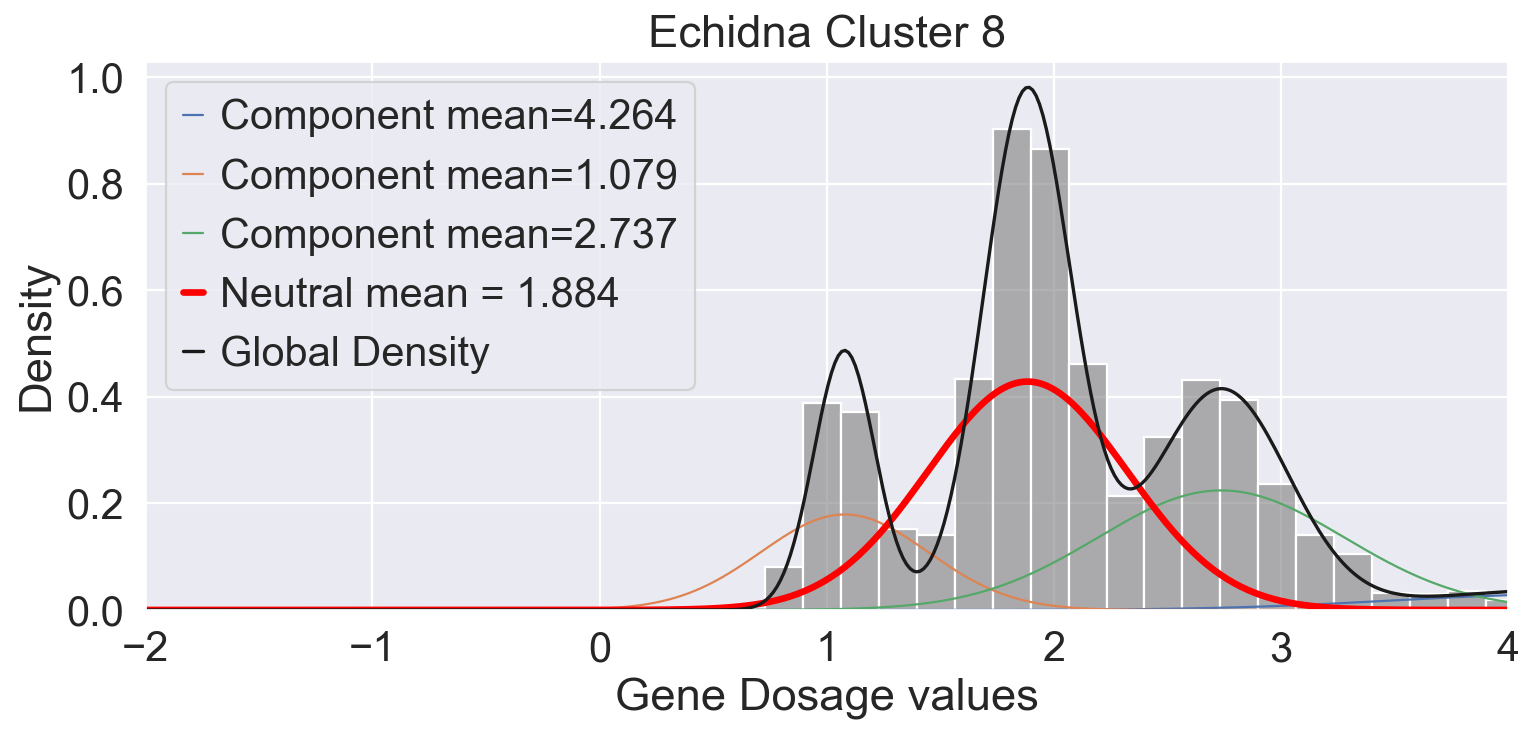

2024-12-08 15:33:45,648 | INFO : maxp pruned
2024-12-08 15:33:45,648 | INFO : LTSH dropped
2024-12-08 15:33:45,649 | INFO : cmap pruned
2024-12-08 15:33:45,649 | INFO : kern dropped
2024-12-08 15:33:45,651 | INFO : post pruned
2024-12-08 15:33:45,652 | INFO : PCLT dropped
2024-12-08 15:33:45,652 | INFO : JSTF dropped
2024-12-08 15:33:45,652 | INFO : DSIG dropped
2024-12-08 15:33:45,654 | INFO : GPOS pruned
2024-12-08 15:33:45,655 | INFO : GSUB pruned
2024-12-08 15:33:45,657 | INFO : glyf pruned
2024-12-08 15:33:45,659 | INFO : Added gid0 to subset
2024-12-08 15:33:45,660 | INFO : Added first four glyphs to subset
2024-12-08 15:33:45,660 | INFO : Closing glyph list over 'GSUB': 39 glyphs before
2024-12-08 15:33:45,660 | INFO : Glyph names: ['.notdef', '.null', 'C', 'D', 'E', 'G', 'N', 'a', 'b', 'c', 'd', 'e', 'equal', 'five', 'four', 'g', 'h', 'i', 'l', 'm', 'minus', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'six', 'space', 't', 'three', 'two', 'u', 'v', 'y',

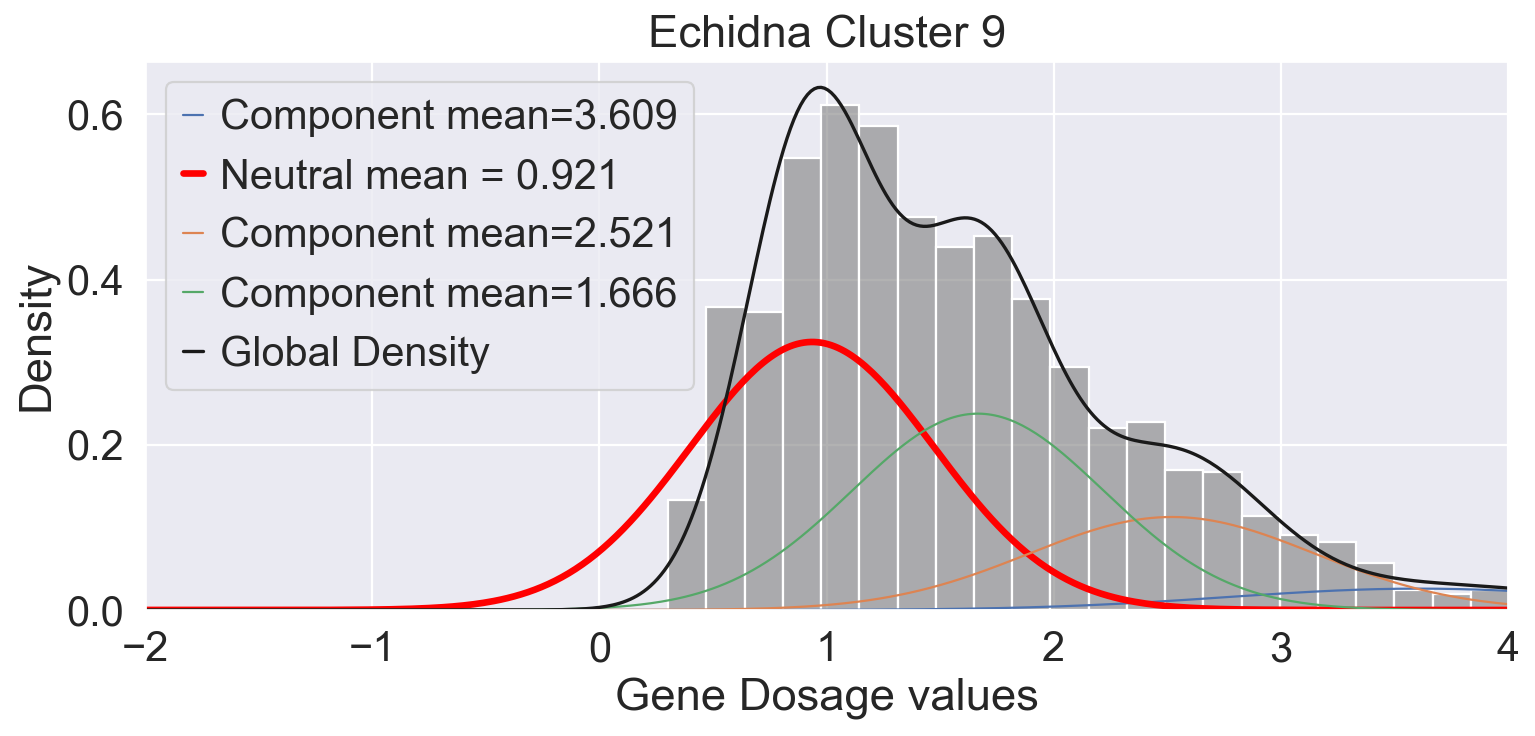

2024-12-08 15:33:46,041 | INFO : maxp pruned
2024-12-08 15:33:46,041 | INFO : LTSH dropped
2024-12-08 15:33:46,042 | INFO : cmap pruned
2024-12-08 15:33:46,042 | INFO : kern dropped
2024-12-08 15:33:46,045 | INFO : post pruned
2024-12-08 15:33:46,045 | INFO : PCLT dropped
2024-12-08 15:33:46,045 | INFO : JSTF dropped
2024-12-08 15:33:46,045 | INFO : DSIG dropped
2024-12-08 15:33:46,048 | INFO : GPOS pruned
2024-12-08 15:33:46,049 | INFO : GSUB pruned
2024-12-08 15:33:46,052 | INFO : glyf pruned
2024-12-08 15:33:46,054 | INFO : Added gid0 to subset
2024-12-08 15:33:46,054 | INFO : Added first four glyphs to subset
2024-12-08 15:33:46,054 | INFO : Closing glyph list over 'GSUB': 41 glyphs before
2024-12-08 15:33:46,055 | INFO : Glyph names: ['.notdef', '.null', 'C', 'D', 'E', 'G', 'N', 'a', 'b', 'c', 'd', 'e', 'eight', 'equal', 'five', 'four', 'g', 'h', 'i', 'l', 'm', 'minus', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'seven', 'six', 'space', 't', 'three', 'tw

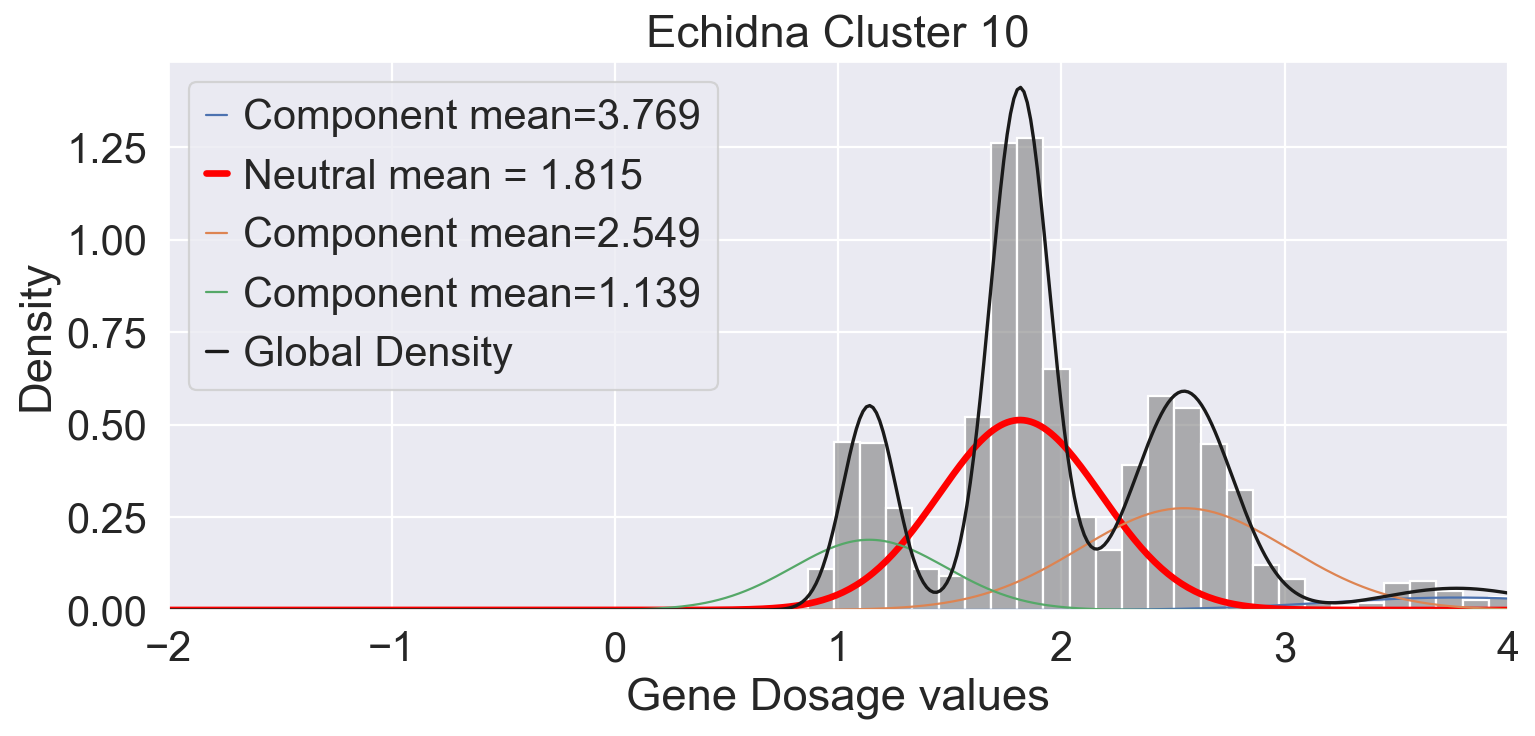

2024-12-08 15:33:46,519 | INFO : maxp pruned
2024-12-08 15:33:46,519 | INFO : LTSH dropped
2024-12-08 15:33:46,520 | INFO : cmap pruned
2024-12-08 15:33:46,520 | INFO : kern dropped
2024-12-08 15:33:46,522 | INFO : post pruned
2024-12-08 15:33:46,523 | INFO : PCLT dropped
2024-12-08 15:33:46,523 | INFO : JSTF dropped
2024-12-08 15:33:46,523 | INFO : DSIG dropped
2024-12-08 15:33:46,526 | INFO : GPOS pruned
2024-12-08 15:33:46,527 | INFO : GSUB pruned
2024-12-08 15:33:46,529 | INFO : glyf pruned
2024-12-08 15:33:46,531 | INFO : Added gid0 to subset
2024-12-08 15:33:46,532 | INFO : Added first four glyphs to subset
2024-12-08 15:33:46,532 | INFO : Closing glyph list over 'GSUB': 39 glyphs before
2024-12-08 15:33:46,532 | INFO : Glyph names: ['.notdef', '.null', 'C', 'D', 'E', 'G', 'N', 'a', 'b', 'c', 'd', 'e', 'eight', 'equal', 'five', 'four', 'g', 'h', 'i', 'l', 'm', 'minus', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'seven', 'space', 't', 'three', 'two', 'u', 'v', '

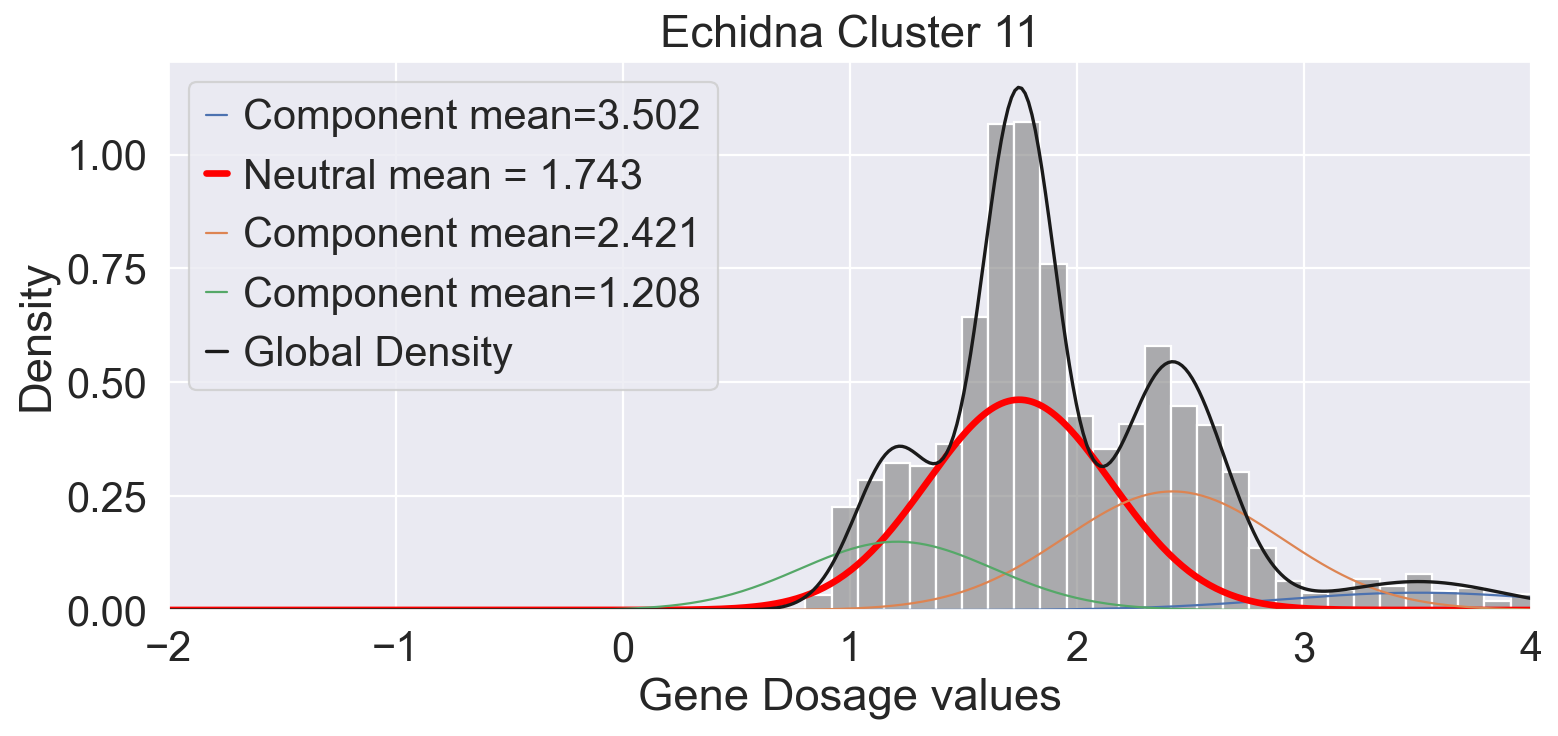

2024-12-08 15:34:30,090 | INFO : Added `.uns['echidna']['save_data']['echi_cnv']` : Path to CNV inference results.
Added `.uns['echidna']['save_data']['gmm_neutrals']` : Path to Echidna cluster neutral value results.


In [9]:
ec.tl.echi_cnv(adata, plot_gmm=True, n_gmm_components=4)

In [76]:
plt.rcParams.update({'font.size': 18})

/Users/joyfan/Desktop/echidna_analyses/josh stuff/./echidna3/echidna/plot/post.py:122: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ticks = [(chrom_counts[i-1] + chrom_counts[i])/2 if i != 0 else chrom_counts[i]/2 for i in range(len(chrom_counts))]
2024-12-08 16:33:17,271 | INFO : maxp pruned
2024-12-08 16:33:17,272 | INFO : LTSH dropped
2024-12-08 16:33:17,272 | INFO : cmap pruned
2024-12-08 16:33:17,273 | INFO : kern dropped
2024-12-08 16:33:17,275 | INFO : post pruned
2024-12-08 16:33:17,275 | INFO : PCLT dropped
2024-12-08 16:33:17,275 | INFO : JSTF dropped
2024-12-08 16:33:17,276 | INFO : DSIG dropped
2024-12-08 16:33:17,278 | INFO : GPOS pruned
2024-12-08 16:33:17,279 | INFO : GSUB pruned
2024-12-08 16:33:17,281 | INFO : glyf pruned
2024-12-08 16:33:17,283 | INFO : Added gid0 to subset
2024-12-

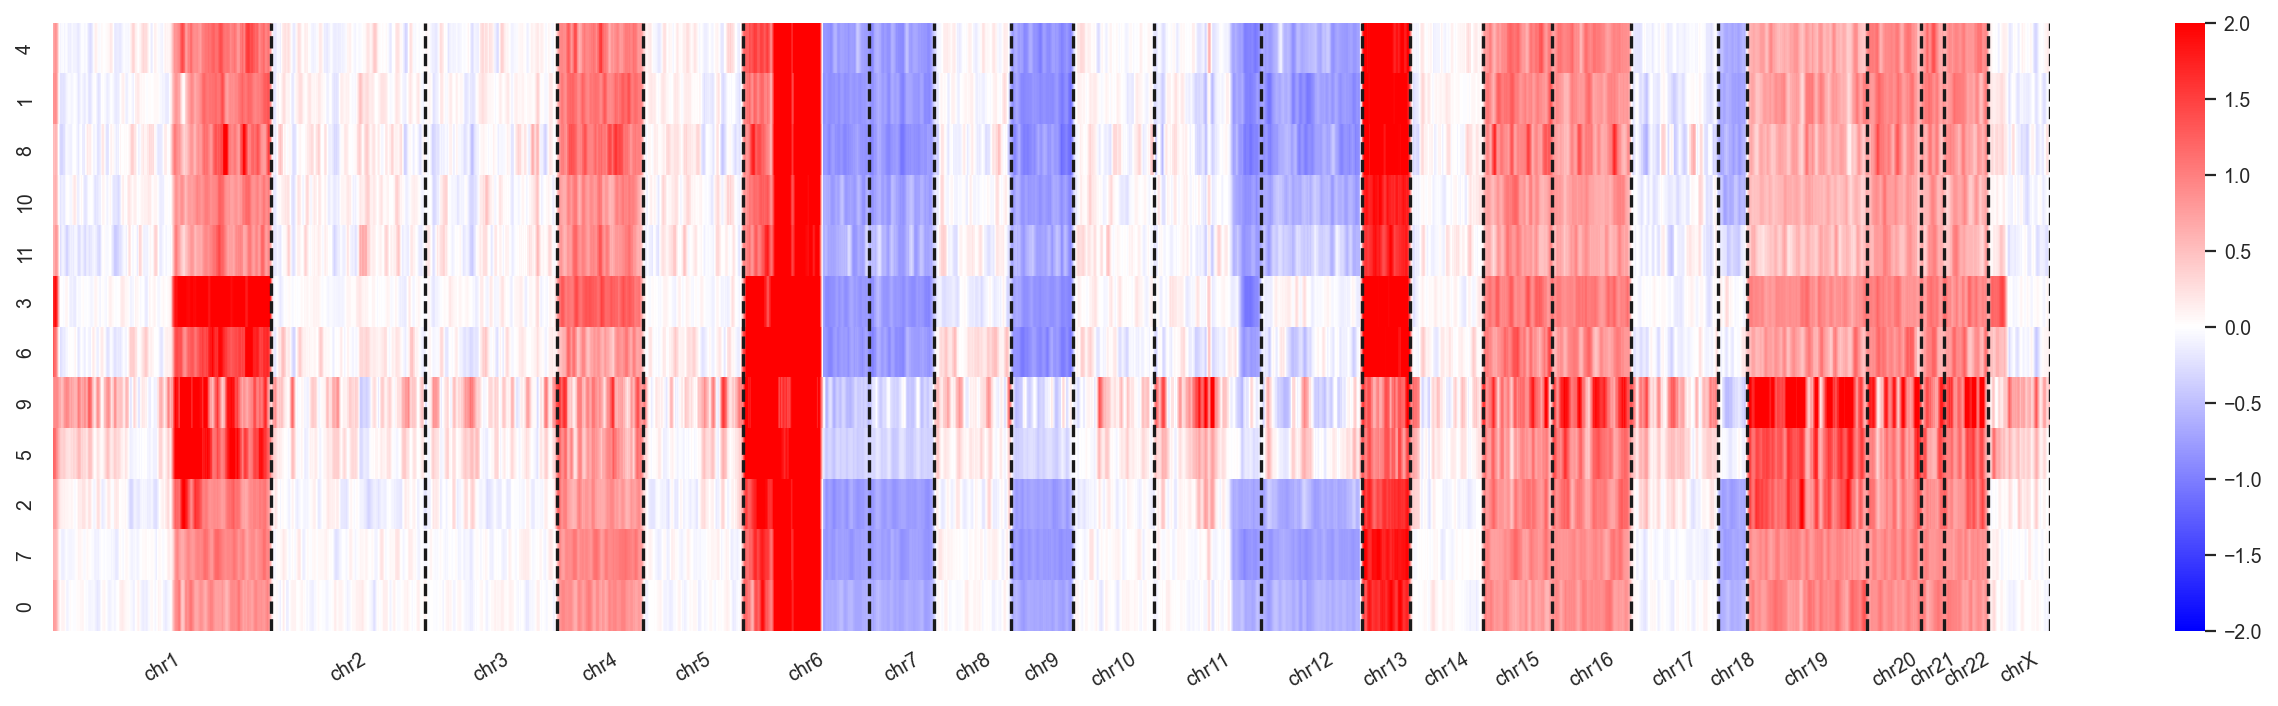

In [35]:
ec.pl.plot_cnv(adata)
plt.savefig("FIGURES/hmm.pdf",dpi=300)

/Users/joyfan/Desktop/echidna_analyses/josh stuff/./echidna3/echidna/plot/post.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ticks = [(chrom_counts[i-1] + chrom_counts[i])/2 if i != 0 else chrom_counts[i]/2 for i in range(len(chrom_counts))]
2024-12-07 12:57:21,247 | INFO : maxp pruned
2024-12-07 12:57:21,248 | INFO : LTSH dropped
2024-12-07 12:57:21,249 | INFO : cmap pruned
2024-12-07 12:57:21,249 | INFO : kern dropped
2024-12-07 12:57:21,251 | INFO : post pruned
2024-12-07 12:57:21,252 | INFO : PCLT dropped
2024-12-07 12:57:21,252 | INFO : JSTF dropped
2024-12-07 12:57:21,252 | INFO : DSIG dropped
2024-12-07 12:57:21,254 | INFO : GPOS pruned
2024-12-07 12:57:21,255 | INFO : GSUB pruned
2024-12-07 12:57:21,257 | INFO : glyf pruned
2024-12-07 12:57:21,259 | INFO : Added gid0 to subset
2024-12-0

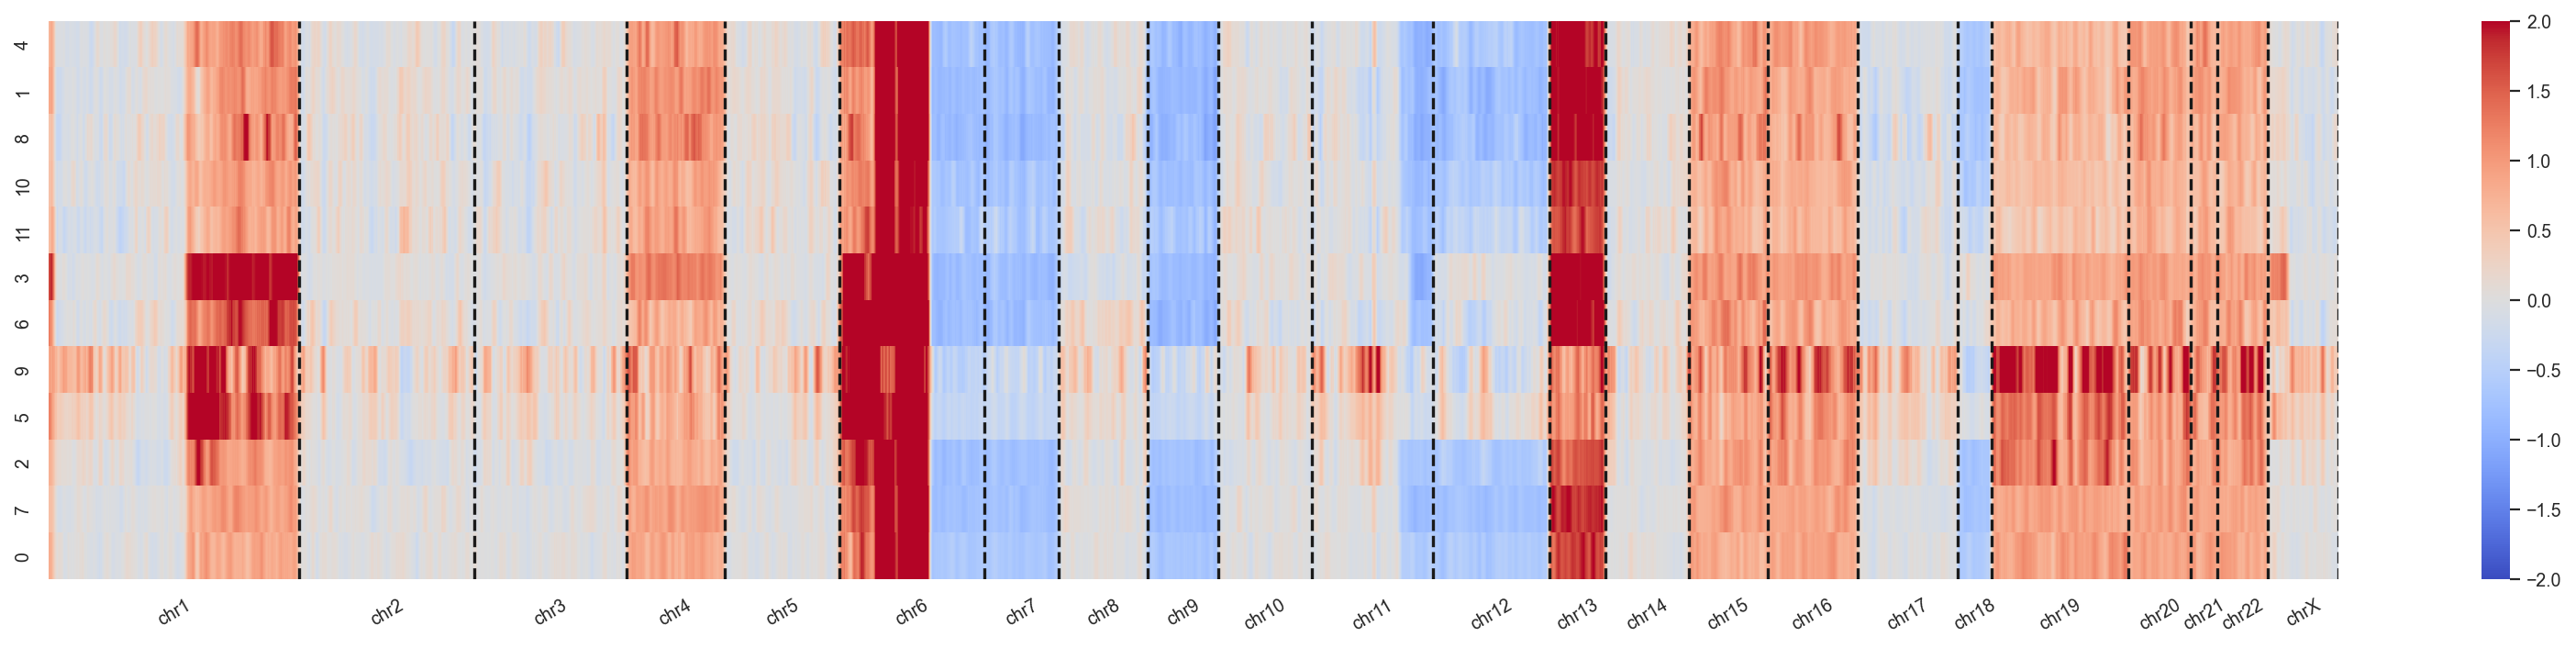

In [36]:
ec.pl.plot_eta(adata)
plt.savefig("FIGURES/eta_data.pdf",dpi=300)

In [16]:
eta = ec.tl.cnv_results(adata)

In [17]:
cnvs = eta[[i for i in eta.columns if "clone" in i and "states" not in i]]

states = eta[[i for i in eta.columns if "states" in i]]

In [18]:
cnvs.columns = [i.split("_")[2] for i in cnvs.columns]
cnvs.columns = ["R310_"+i for i in cnvs.columns]

states.columns = [i.split("_")[3] for i in states.columns]
states.columns = ["R310_"+i for i in states.columns]

In [19]:
states.to_csv("r310_states")

In [20]:
status = pd.read_csv("echidna_clone_status.8.1.24.csv", index_col=0).dropna().T
status.columns = ["status"]

In [21]:
status = status.loc[cnvs.columns]

In [22]:
cnvs_shrink = cnvs[status[status.status=="shrinking"].index]
states_shrink = states[status[status.status=="shrinking"].index]

In [23]:
cnvs_grow = cnvs[status[status.status=="growing"].index]
states_grow = states[status[status.status=="growing"].index]

In [11]:
ec.tl.gene_dosage_effect(adata)

2024-12-08 15:35:04,255 | INFO : Added `.uns['echidna']['save_data']['gene_dosage']` : Path to gene dosage effect results.


In [337]:
sns.set(font_scale = 1.2)

In [54]:
reconstruct_W = ec.tl.eval.sample_W(adata)

In [58]:
reconstruct_W = pd.DataFrame(reconstruct_W, columns=adata.var_names)

In [331]:
reconstruct_W = reconstruct_W.dropna()
neut = [find_neutrals(list(reconstruct_W.T[0]))]

In [332]:
neut = neut+[find_neutrals(list(reconstruct_W.T[1]))]

In [333]:
delta_wgs = pd.DataFrame()
for cluster in reconstruct_W.index:
    delta_wgs[cluster]=np.asarray(reconstruct_W.loc[cluster])-neut[cluster]
delta_wgs.index = reconstruct_W.columns

In [334]:
draw_lines, chr_list, genes = eta_no_bin(delta_wgs)

In [335]:
delta_wgs = delta_wgs.loc[genes]

2024-12-14 10:22:37,909 | INFO : maxp pruned
2024-12-14 10:22:37,909 | INFO : LTSH dropped
2024-12-14 10:22:37,910 | INFO : cmap pruned
2024-12-14 10:22:37,911 | INFO : kern dropped
2024-12-14 10:22:37,913 | INFO : post pruned
2024-12-14 10:22:37,914 | INFO : PCLT dropped
2024-12-14 10:22:37,914 | INFO : JSTF dropped
2024-12-14 10:22:37,914 | INFO : DSIG dropped
2024-12-14 10:22:37,917 | INFO : GPOS pruned
2024-12-14 10:22:37,918 | INFO : GSUB pruned
2024-12-14 10:22:37,921 | INFO : glyf pruned
2024-12-14 10:22:37,923 | INFO : Added gid0 to subset
2024-12-14 10:22:37,924 | INFO : Added first four glyphs to subset
2024-12-14 10:22:37,924 | INFO : Closing glyph list over 'GSUB': 23 glyphs before
2024-12-14 10:22:37,924 | INFO : Glyph names: ['.notdef', '.null', 'X', 'c', 'e', 'eight', 'five', 'four', 'h', 'minus', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'r', 'seven', 'six', 'space', 'three', 'two', 'zero']
2024-12-14 10:22:37,925 | INFO : Glyph IDs:   [0, 1, 2, 3, 19, 20, 21, 2

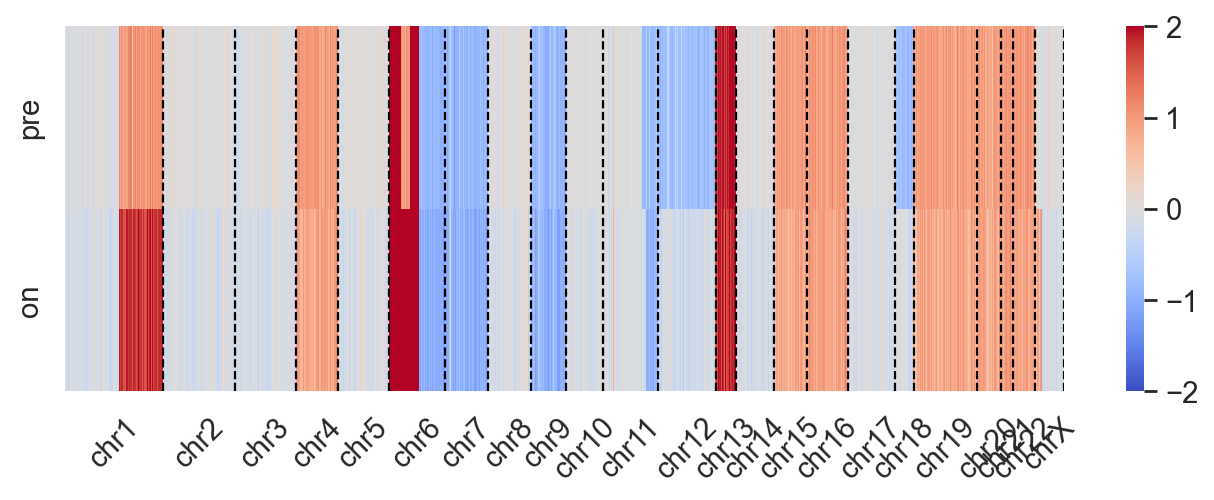

In [338]:
plt.figure(figsize=(10,3))
sns.heatmap(delta_wgs.T, cmap='coolwarm', vmax=2, vmin=-2)

plt.yticks([.5,1.5],labels=["pre","on"])
ticklines = []
for i in range(len(draw_lines)):
    plt.axvline(x=draw_lines[i], color='black', linestyle='--', linewidth=1)
    if i==0:
        ticklines.append(draw_lines[i]-.5*draw_lines[0])
        #plt.text(draw_lines[i]-.5*draw_lines[0], delta_wgs.T.shape[0]+.4, chr_list[i], color='black', fontsize=10, rotation=45)
    else:
        ticklines.append(draw_lines[i-1]+.5*(draw_lines[i]-draw_lines[i-1]))
        #plt.text(draw_lines[i-1]+.5*(draw_lines[i]-draw_lines[i-1]), delta_wgs.T.shape[0]+.4, chr_list[i], color='black', fontsize=10, rotation=45)
plt.xticks(ticklines, labels=chr_list, rotation=45)
plt.xlabel(None)
plt.savefig("FIGURES1/WGS_reconstruct.pdf",dpi=300)

In [ ]:
wdf = wdf.dropna()

In [324]:
#since this is ichor outputs the neutral returns as 2 for both pre and on so no need for shifting (just adjust colorbar)
neut = [find_neutrals(list(wdf['R310_pre_count']))]
neut = neut + [find_neutrals(list(wdf['R310_on2_count']))]

In [325]:
wdf = wdf.T

In [326]:
delta_wgs = pd.DataFrame()
for n, cluster in enumerate(wdf.index):
    delta_wgs[cluster]=np.asarray(wdf.loc[cluster])-neut[n]
delta_wgs.index = wdf.columns

In [327]:
draw_lines, chr_list, genes = eta_no_bin(delta_wgs)

In [328]:
delta_wgs = delta_wgs.loc[genes]

2024-12-14 10:17:37,555 | INFO : maxp pruned
2024-12-14 10:17:37,555 | INFO : LTSH dropped
2024-12-14 10:17:37,556 | INFO : cmap pruned
2024-12-14 10:17:37,556 | INFO : kern dropped
2024-12-14 10:17:37,558 | INFO : post pruned
2024-12-14 10:17:37,559 | INFO : PCLT dropped
2024-12-14 10:17:37,559 | INFO : JSTF dropped
2024-12-14 10:17:37,559 | INFO : DSIG dropped
2024-12-14 10:17:37,561 | INFO : GPOS pruned
2024-12-14 10:17:37,562 | INFO : GSUB pruned
2024-12-14 10:17:37,565 | INFO : glyf pruned
2024-12-14 10:17:37,566 | INFO : Added gid0 to subset
2024-12-14 10:17:37,567 | INFO : Added first four glyphs to subset
2024-12-14 10:17:37,567 | INFO : Closing glyph list over 'GSUB': 23 glyphs before
2024-12-14 10:17:37,567 | INFO : Glyph names: ['.notdef', '.null', 'X', 'c', 'e', 'eight', 'five', 'four', 'h', 'minus', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'r', 'seven', 'six', 'space', 'three', 'two', 'zero']
2024-12-14 10:17:37,567 | INFO : Glyph IDs:   [0, 1, 2, 3, 19, 20, 21, 2

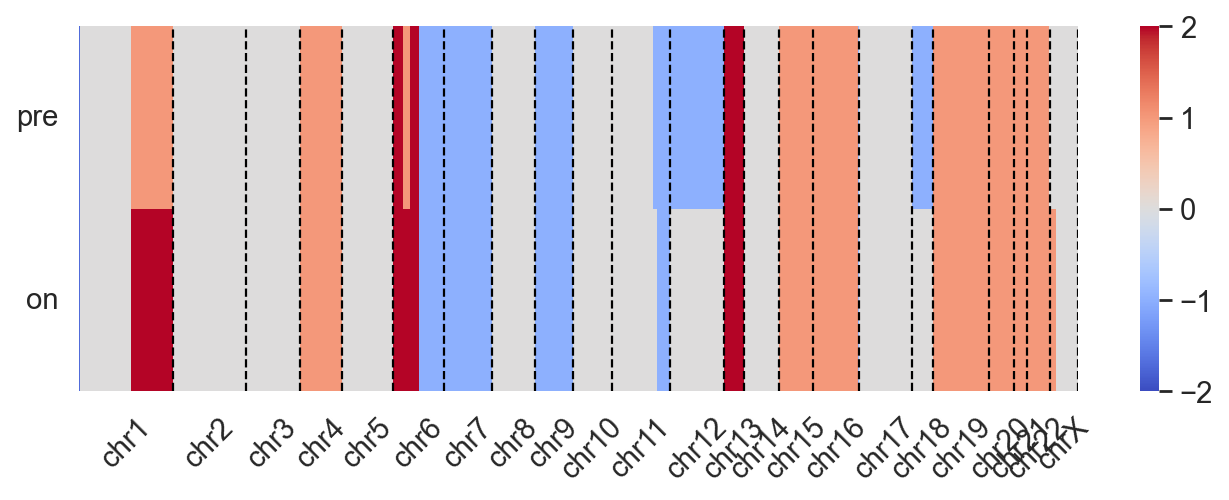

In [329]:
plt.figure(figsize=(10,3))
sns.heatmap(delta_wgs.T, cmap='coolwarm', vmax=2, vmin=-2)

plt.yticks([.5,1.5],labels=["pre","on"])
ticklines = []
for i in range(len(draw_lines)):
    plt.axvline(x=draw_lines[i], color='black', linestyle='--', linewidth=1)
    if i==0:
        ticklines.append(draw_lines[i]-.5*draw_lines[0])
        #plt.text(draw_lines[i]-.5*draw_lines[0], delta_wgs.T.shape[0]+.4, chr_list[i], color='black', fontsize=10, rotation=45)
    else:
        ticklines.append(draw_lines[i-1]+.5*(draw_lines[i]-draw_lines[i-1]))
        #plt.text(draw_lines[i-1]+.5*(draw_lines[i]-draw_lines[i-1]), delta_wgs.T.shape[0]+.4, chr_list[i], color='black', fontsize=10, rotation=45)
plt.xticks(ticklines, labels=chr_list, rotation=45)
plt.xlabel(None)
#plt.savefig("FIGURES1/WGS_observed.pdf",dpi=300)

In [148]:
from hmmlearn import hmm
from sklearn.mixture import GaussianMixture
def find_neutrals(vals_filtered):
    gmm = GaussianMixture(n_components=5)
    
    # Fit the model to the data
    gmm.fit(np.asarray([vals_filtered]).T)
    
    
    # Predict the cluster for each data point
    labels = gmm.predict(np.asarray([vals_filtered]).T)
    
    neut_component = scipy.stats.mode(labels)[0]
    #print(np.unique(labels, return_counts=True))
    gmm_val = pd.DataFrame({"components":labels,"vals":vals_filtered})
    gmm_mean = np.mean(gmm_val[gmm_val["components"]==neut_component]["vals"])
    gmm_std = np.std(gmm_val[gmm_val["components"]==neut_component]["vals"])
    
    return gmm_mean

2024-12-08 16:06:29,257 | INFO : maxp pruned
2024-12-08 16:06:29,258 | INFO : LTSH dropped
2024-12-08 16:06:29,258 | INFO : cmap pruned
2024-12-08 16:06:29,258 | INFO : kern dropped
2024-12-08 16:06:29,261 | INFO : post pruned
2024-12-08 16:06:29,261 | INFO : PCLT dropped
2024-12-08 16:06:29,261 | INFO : JSTF dropped
2024-12-08 16:06:29,261 | INFO : DSIG dropped
2024-12-08 16:06:29,263 | INFO : GPOS pruned
2024-12-08 16:06:29,265 | INFO : GSUB pruned
2024-12-08 16:06:29,267 | INFO : glyf pruned
2024-12-08 16:06:29,268 | INFO : Added gid0 to subset
2024-12-08 16:06:29,269 | INFO : Added first four glyphs to subset
2024-12-08 16:06:29,269 | INFO : Closing glyph list over 'GSUB': 35 glyphs before
2024-12-08 16:06:29,269 | INFO : Glyph names: ['.notdef', '.null', 'C', 'D', 'E', 'G', 'T', 'X', 'a', 'c', 'comma', 'e', 'f', 'five', 'g', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'r', 's', 'seven', 'space', 't', 'three', 'two', 'u', 'zero']
20

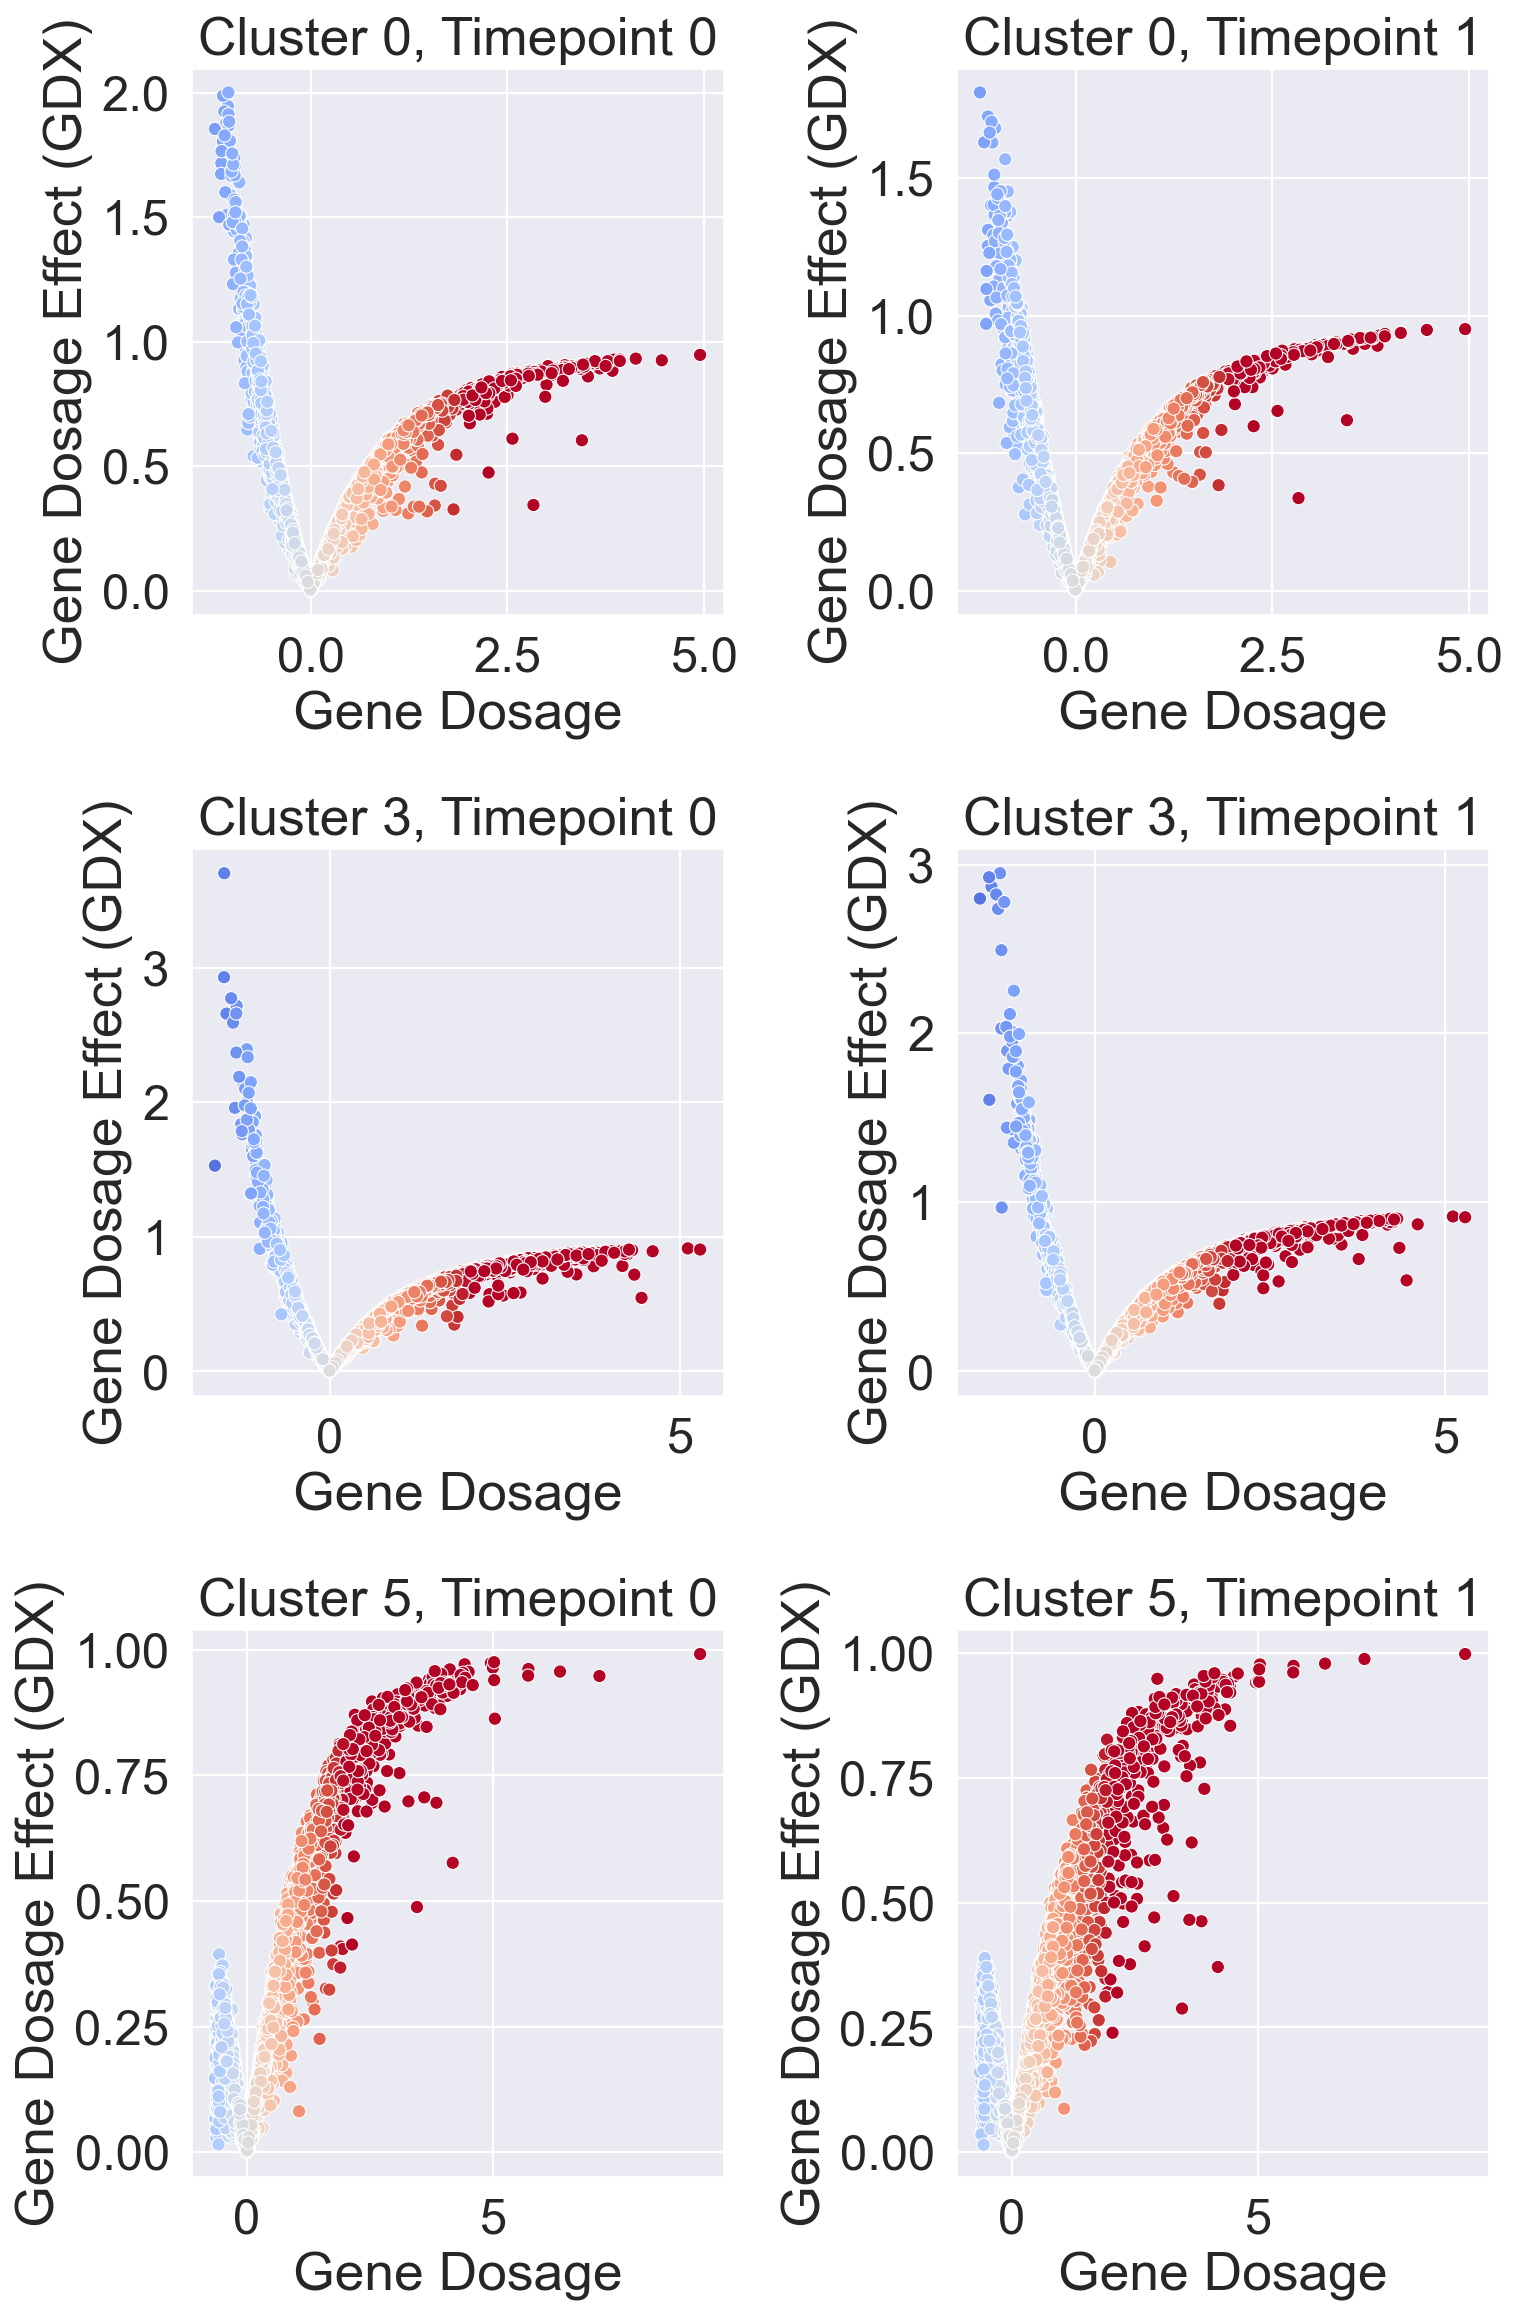

In [14]:
ec.pl.plot_gene_dosage(
    adata, clusters=[0,3,5], timepoints=[0,1], quantile=.8, filename="FIGURES1/gdx_v_plots.pdf"
)

In [258]:
ordered_genes = np.load("ordered_genes.npy")
ordchrs = np.load("ordered_chrs.npy")
pal = {"del":"blue","neut":"grey","amp":"red"}

def eta_no_bin(eta):
    inds = []
    draw_lines = []
    ch = 'chr1'
    chr_list = [ch]
    count=0
    for i in range(len(ordered_genes)):
        if ordered_genes[i] in eta.index:
            inds.append(ordered_genes[i])
            count+=1
            if ordchrs[i]!=ch:
                draw_lines.append(count)
                ch=ordchrs[i]
                chr_list.append(ch)
    draw_lines.append(count)
    return draw_lines, chr_list, inds



In [38]:
sns.set(font_scale = 1.7)
sns.set_style("whitegrid")

2024-12-08 16:36:05,993 | INFO : maxp pruned
2024-12-08 16:36:05,994 | INFO : LTSH dropped
2024-12-08 16:36:05,994 | INFO : cmap pruned
2024-12-08 16:36:05,994 | INFO : kern dropped
2024-12-08 16:36:05,997 | INFO : post pruned
2024-12-08 16:36:05,997 | INFO : PCLT dropped
2024-12-08 16:36:05,997 | INFO : JSTF dropped
2024-12-08 16:36:05,997 | INFO : DSIG dropped
2024-12-08 16:36:05,999 | INFO : GPOS pruned
2024-12-08 16:36:06,000 | INFO : GSUB pruned
2024-12-08 16:36:06,003 | INFO : glyf pruned
2024-12-08 16:36:06,004 | INFO : Added gid0 to subset
2024-12-08 16:36:06,005 | INFO : Added first four glyphs to subset
2024-12-08 16:36:06,005 | INFO : Closing glyph list over 'GSUB': 30 glyphs before
2024-12-08 16:36:06,005 | INFO : Glyph names: ['.notdef', '.null', 'C', 'N', 'X', 'b', 'c', 'e', 'eight', 'five', 'four', 'g', 'h', 'i', 'k', 'm', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'r', 's', 'seven', 'six', 'space', 'three', 'two', 'underscore', 'zero']
2024-12-08 16:36:06,005 | INFO :

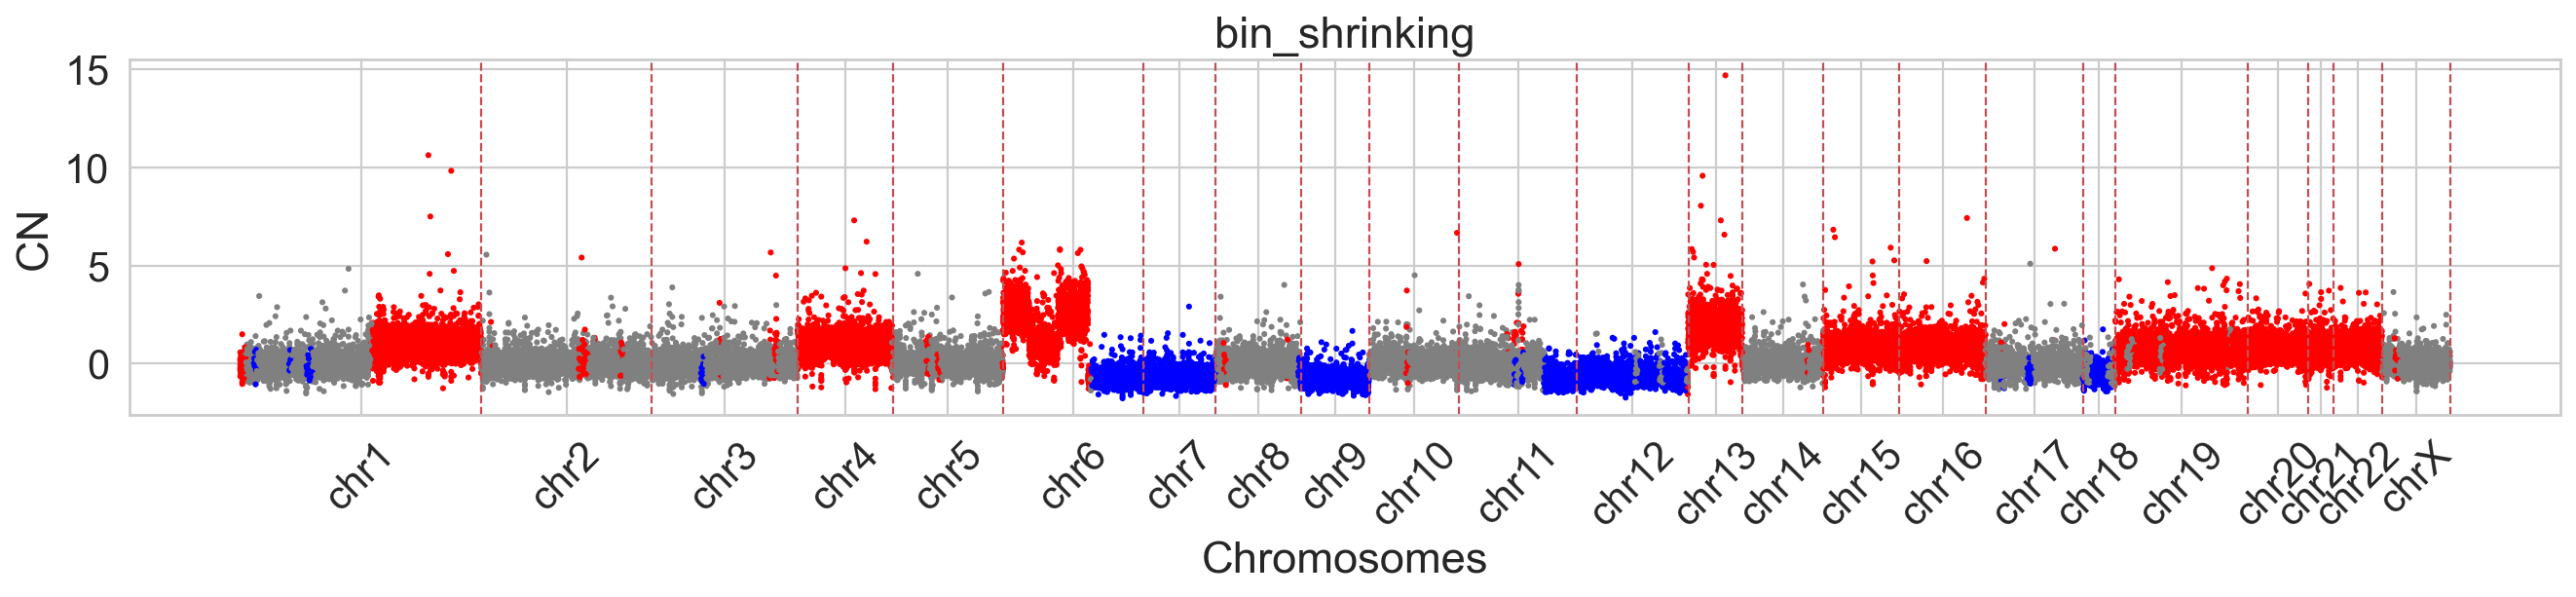

In [45]:
val_list = []
states_list = []
for i in cnvs_shrink.columns:
    vals = np.asarray(cnvs_shrink.loc[[i for i in ordered_genes if i in cnvs_shrink.index]][i])
    val_list.append(vals)
    states_list.append(states_shrink[i])
    
draw_lines, chr_list = eta_no_bin(cnvs_shrink["R310_0"])
plot(val_list, states_list, "bin_shrinking", draw_lines, chr_list)

2024-12-08 16:36:08,096 | INFO : maxp pruned
2024-12-08 16:36:08,096 | INFO : LTSH dropped
2024-12-08 16:36:08,097 | INFO : cmap pruned
2024-12-08 16:36:08,097 | INFO : kern dropped
2024-12-08 16:36:08,100 | INFO : post pruned
2024-12-08 16:36:08,100 | INFO : PCLT dropped
2024-12-08 16:36:08,101 | INFO : JSTF dropped
2024-12-08 16:36:08,101 | INFO : DSIG dropped
2024-12-08 16:36:08,103 | INFO : GPOS pruned
2024-12-08 16:36:08,106 | INFO : GSUB pruned
2024-12-08 16:36:08,108 | INFO : glyf pruned
2024-12-08 16:36:08,110 | INFO : Added gid0 to subset
2024-12-08 16:36:08,111 | INFO : Added first four glyphs to subset
2024-12-08 16:36:08,111 | INFO : Closing glyph list over 'GSUB': 30 glyphs before
2024-12-08 16:36:08,111 | INFO : Glyph names: ['.notdef', '.null', 'C', 'N', 'X', 'b', 'c', 'e', 'eight', 'five', 'four', 'g', 'h', 'i', 'm', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'r', 's', 'seven', 'six', 'space', 'three', 'two', 'underscore', 'w', 'zero']
2024-12-08 16:36:08,112 | INFO :

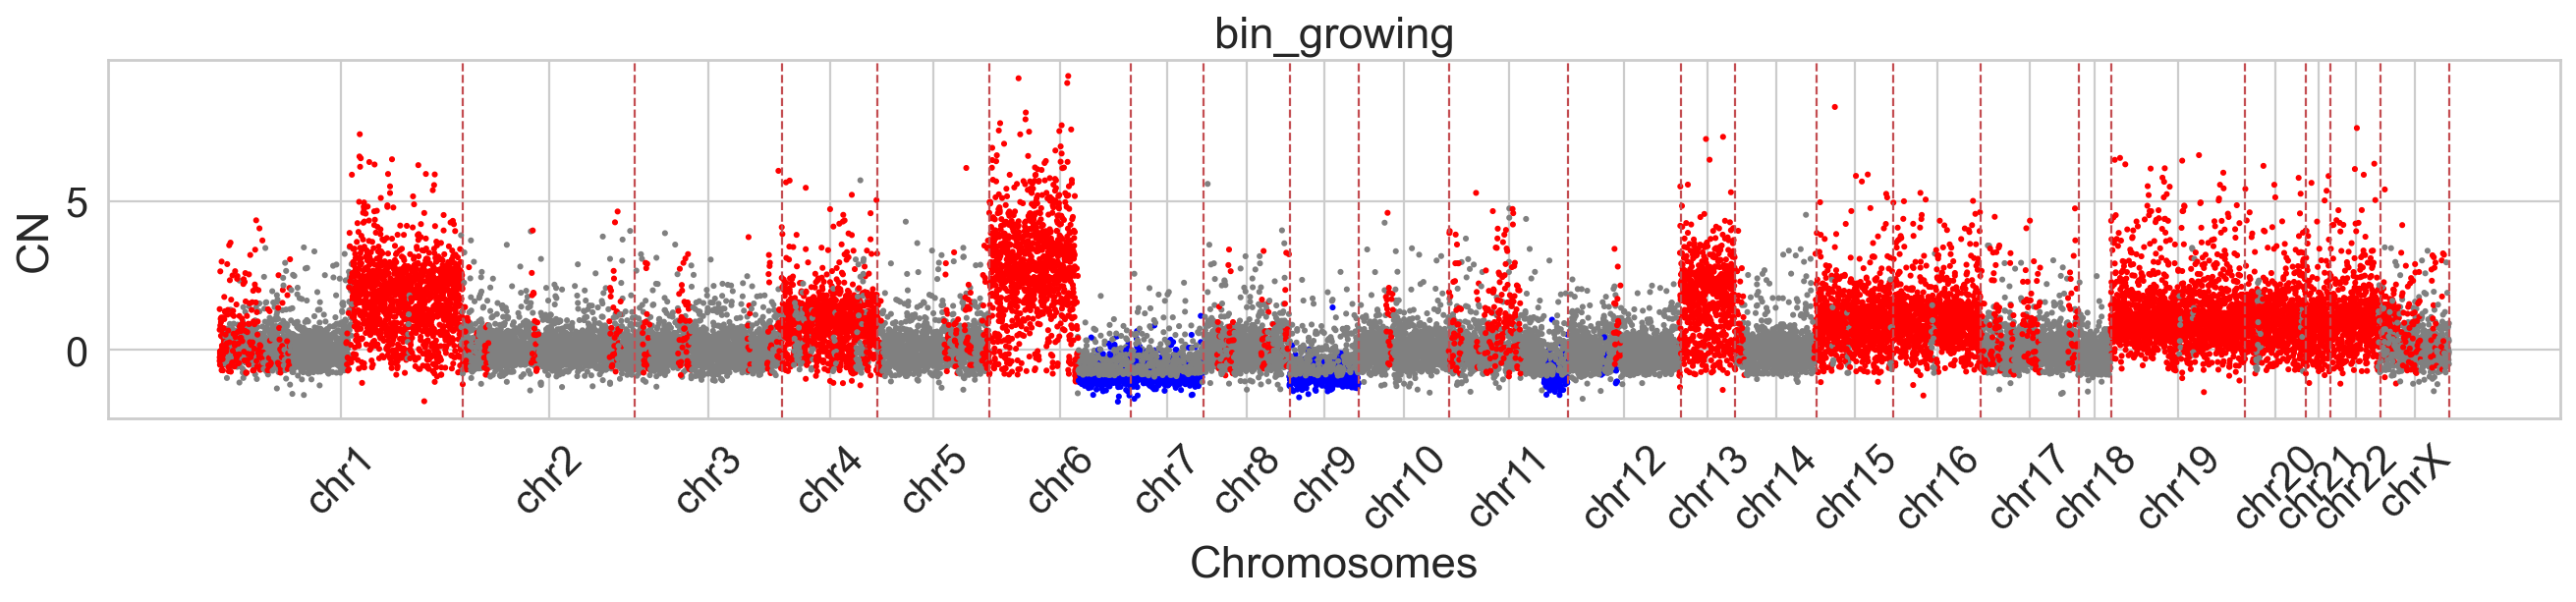

In [46]:
val_list = []
states_list = []
for i in cnvs_grow.columns:
    vals = np.asarray(cnvs_grow.loc[[i for i in ordered_genes if i in cnvs_grow.index]][i])
    val_list.append(vals)
    states_list.append(states_grow[i])
    
draw_lines, chr_list = eta_no_bin(cnvs_grow["R310_5"])
plot(val_list, states_list, "bin_growing", draw_lines, chr_list)

In [44]:
def plot(vals_list, states_list, title, draw_lines, chrs):
    '''
    plot the CNV states along the genome
    vals: ordered copy number values (from bin_by_bands function)
    states: CN state calls from the HMM (get_states function)
    title: title of the figure, for saving
    draw_lines: coordinates of the end of each chromosome (from bin_by_bands)
    chrs: chromosome names (from bin_by_bands)
    '''
    plt.figure(figsize=(20,3))
    bar_width = 0.8
    
    for i in range(len(vals_list)):
        # Calculate the x positions for the bars
        vals = vals_list[i]
        states = states_list[i]
        x_positions = np.arange(len(vals))
        
        flipped = []
        for i in states:
            if i=="neut":
                flipped.append('grey')
            elif i=="amp":
                flipped.append('red')
            else:
                flipped.append('blue')
    
        #for i in range(len(flipped)):
        #    plt.axvline(x=x_positions[i], color=flipped[i], linestyle='-', alpha=0.01, linewidth=1)
            
        plt.scatter(x_positions, vals, c=flipped,s=3)
        
        # Set the x-axis ticks and labels
        ticks = []
        for i in range(len(draw_lines)):
            if i==0:
                ticks.append(draw_lines[i]/2)
            else:
                ticks.append(draw_lines[i-1]+(draw_lines[i]-draw_lines[i-1])/2)

    plt.xticks(ticks=ticks, labels=chrs, rotation=45)
    
    for x in draw_lines:
        plt.axvline(x=x, color='r', linestyle='--', linewidth=1)  # Draw vertical line at each x-coordinate
        
    plt.xlabel('Chromosomes')
    plt.ylabel('CN')
    plt.title(title)
    plt.grid(True)
    plt.savefig("FIGURES1/"+title+".pdf",format="pdf", dpi=300, bbox_inches='tight')
    plt.show()